In [31]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime

# figure size in inches
pd.options.display.max_columns = 100
pd.options.display.max_rows = 5

In [22]:
DATA_PATH = 'data/gsom/gsom-latest'
data_dir = os.listdir(DATA_PATH)
print("[*] Number of data:", len(data_dir))

[*] Number of data: 115904


In [23]:
USC_data = []
data_dict = {}
for csv_file in data_dir:
    station = csv_file[:3]
    if station not in data_dict:
        data_dict[station] = 1
    else:
        data_dict[station] += 1
    if 'USC' in csv_file:
        USC_data.append(os.path.join(DATA_PATH, csv_file))

print('[*] Data length:', len(USC_data))

[*] Data length: 22508


In [24]:
# Take last 100 csv data
USC_data = USC_data[-100:]

In [57]:
df = pd.concat(map(pd.read_csv, USC_data), ignore_index=True)[-10000:]
for col in df.columns:
    df[col] = df[col].interpolate(method='bfill')
    df[col] = df[col].interpolate(method='nearest')
df

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,DP01,DP01_ATTRIBUTES,DP10,DP10_ATTRIBUTES,DP1X,DP1X_ATTRIBUTES,DSND,DSND_ATTRIBUTES,DSNW,DSNW_ATTRIBUTES,DT00,DT00_ATTRIBUTES,DT32,DT32_ATTRIBUTES,DX32,DX32_ATTRIBUTES,DX70,DX70_ATTRIBUTES,DX90,DX90_ATTRIBUTES,DYFG,DYFG_ATTRIBUTES,DYTS,DYTS_ATTRIBUTES,EMNT,EMNT_ATTRIBUTES,EMSD,EMSD_ATTRIBUTES,EMSN,EMSN_ATTRIBUTES,EMXP,EMXP_ATTRIBUTES,EMXT,EMXT_ATTRIBUTES,HDSD,HDSD_ATTRIBUTES,HTDD,HTDD_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,EVAP,EVAP_ATTRIBUTES,MNPN,MNPN_ATTRIBUTES,MXPN,MXPN_ATTRIBUTES,WDMV,WDMV_ATTRIBUTES
32869,USC00046525,1922-06,39.51667,-121.56667,52.1,"OROVILLE BRIDGE, CA US",0.0,0.0,19.3,",0",0.0,",6",0.0,",6",0.0,",6",0.0,",0",1.0,",6",0.0,",0",3.0,",0",0.0,",0",16.0,",0",0.0,",0",7.0,NaN,1.0,NaN,-2.8,",0,03,",0.0,",,0,31,+",51.0,",,6,10,",0.0,",,6,30,+",30.6,",0,19,",0.0,0,153.7,",0",0.0,",,,6",51.0,",,,6",13.85,",0",21.57,",,,0",6.13,",,,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32870,USC00046525,1922-07,39.51667,-121.56667,52.1,"OROVILLE BRIDGE, CA US",0.0,0.0,19.3,",0",0.0,",6",0.0,",6",0.0,",6",0.0,",0",1.0,",6",0.0,",0",3.0,",0",0.0,",0",16.0,",0",0.0,",0",7.0,NaN,1.0,NaN,-2.8,",0,03,",0.0,",,0,31,+",51.0,",,6,10,",0.0,",T,6,19,",30.6,",0,19,",0.0,0,153.7,",0",0.0,",T,,6",51.0,",,,6",13.85,",0",21.57,",,,0",6.13,",,,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42867,USC00390043,2022-01,43.48944,-99.06289,512.4,"ACADEMY 2 NE, SD US",0.0,NaN,0.0,",7",4.0,",7",1.0,",7",0.0,",7",5.0,",7",2.0,",7",12.0,",7",31.0,",7",11.0,",7",0.0,",7",0.0,",7",NaN,NaN,NaN,NaN,-26.7,",7,02,",51.0,",,7,03,+",51.0,",,7,01,",2.8,",,7,01,",11.7,",7,19,",2078.8,NaN,764.6,",7",5.4,",,,7",76.0,",,,7",-6.33,",7",1.24,",,,7",-13.90,",,,7",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42868,USC00390043,2022-02,43.48944,-99.06289,512.4,"ACADEMY 2 NE, SD US",0.0,NaN,0.0,",H",4.0,",H",0.0,",H",0.0,",H",4.0,"1,H",2.0,"1,H",11.0,",H",27.0,",H",12.0,",H",0.0,",H",0.0,",H",NaN,NaN,NaN,NaN,-25.6,",H,25,",51.0,"1,,H,26,+",25.0,"1,,H,25,+",1.0,",,H,22,",15.6,",H,08,",2755.8,NaN,677.0,",H",2.4,",,,H",50.0,"1,,,H",-5.85,",H",2.08,",,,H",-13.78,",,,H",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df['DATE'] = df['DATE'].astype('datetime64[ns]')
df = df.sort_values(by='DATE', ascending=True)
df

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,DP01,DP01_ATTRIBUTES,DP10,DP10_ATTRIBUTES,DP1X,DP1X_ATTRIBUTES,DSND,DSND_ATTRIBUTES,DSNW,DSNW_ATTRIBUTES,DT00,DT00_ATTRIBUTES,DT32,DT32_ATTRIBUTES,DX32,DX32_ATTRIBUTES,DX70,DX70_ATTRIBUTES,DX90,DX90_ATTRIBUTES,DYFG,DYFG_ATTRIBUTES,DYTS,DYTS_ATTRIBUTES,EMNT,EMNT_ATTRIBUTES,EMSD,EMSD_ATTRIBUTES,EMSN,EMSN_ATTRIBUTES,EMXP,EMXP_ATTRIBUTES,EMXT,EMXT_ATTRIBUTES,HDSD,HDSD_ATTRIBUTES,HTDD,HTDD_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,EVAP,EVAP_ATTRIBUTES,MNPN,MNPN_ATTRIBUTES,MXPN,MXPN_ATTRIBUTES,WDMV,WDMV_ATTRIBUTES
35127,USC00382917,1893-01-01,33.40000,-80.35000,36.9,"EUTAWVILLE, SC US",0.0,6.0,0.0,"3,6",4.0,",6",3.0,",6",1.0,",6",0.0,",0",0.0,",6",0.0,"2,6",18.0,"2,6",0.0,"1,6",0.0,"1,6",0.0,"1,6",1.0,NaN,1.0,NaN,-12.8,"2,6,17,",0.0,",T,0,31,+",5.0,",,6,28,",90.2,",,6,19,",20.6,"1,6,31,+",0.0,6.0,378.1,"1,6",106.7,",,,6",5.0,",,,6",4.87,"3,6",11.16,"1,,,6",-1.41,"2,,,6",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34420,USC00333356,1893-01-01,39.34180,-83.37660,261.5,"GREENFIELD WWTP, OH US",0.0,6.0,0.0,",6",8.0,"1,6",7.0,"1,6",0.0,"1,6",0.0,",0",1.0,",6",9.0,",6",30.0,",6",21.0,",6",0.0,",6",0.0,",6",1.0,NaN,8.0,NaN,-26.1,",6,15,",0.0,",,0,30,+",114.0,",,6,21,",19.1,"1,,6,05,",11.1,",6,28,",0.0,6.0,772.1,",6",71.1,"1,,,6",114.0,",,,6",-6.57,",6",-1.99,",,,6",-11.16,",,,6",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40691,USC00255310,2022-02-01,40.22887,-100.61000,793.1,"MC COOK, NE US",0.0,6.0,0.0,",H",0.0,",H",0.0,",H",0.0,",H",0.0,",0",0.0,",0",5.0,",H",28.0,",H",5.0,",H",0.0,",H",0.0,",H",1.0,NaN,3.0,NaN,-21.1,",H,25,",0.0,",,0,30,+",0.0,",,0,30,+",0.0,",,H,28,+",20.0,",H,28,",0.0,6.0,542.1,",H",0.0,",,,H",0.0,",,,0",-1.03,",H",8.12,",,,H",-10.17,",,,H",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42868,USC00390043,2022-02-01,43.48944,-99.06289,512.4,"ACADEMY 2 NE, SD US",0.0,NaN,0.0,",H",4.0,",H",0.0,",H",0.0,",H",4.0,"1,H",2.0,"1,H",11.0,",H",27.0,",H",12.0,",H",0.0,",H",0.0,",H",NaN,NaN,NaN,NaN,-25.6,",H,25,",51.0,"1,,H,26,+",25.0,"1,,H,25,+",1.0,",,H,22,",15.6,",H,08,",2755.8,NaN,677.0,",H",2.4,",,,H",50.0,"1,,,H",-5.85,",H",2.08,",,,H",-13.78,",,,H",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
def plot_date(df, year):
    mask = (df['DATE'] >= f'{year}-01-01') & (df['DATE'] < f'{year+1}-01-01')
    _df = df.loc[mask]
    sns.lineplot(data=_df, x="DATE", y="TAVG")

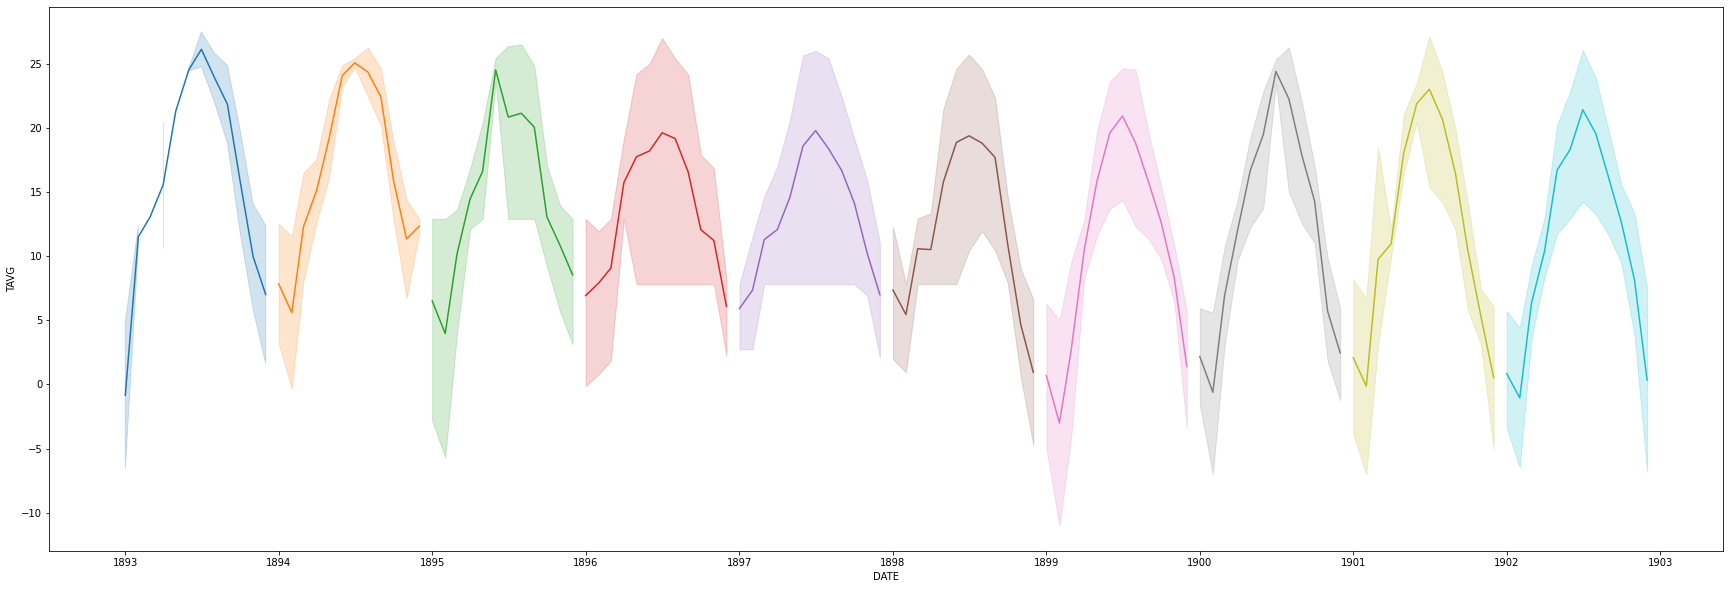

In [74]:
plt.figure(figsize=(30, 10))
for i in range(1893, 1893+10):
    plot_date(df, i)

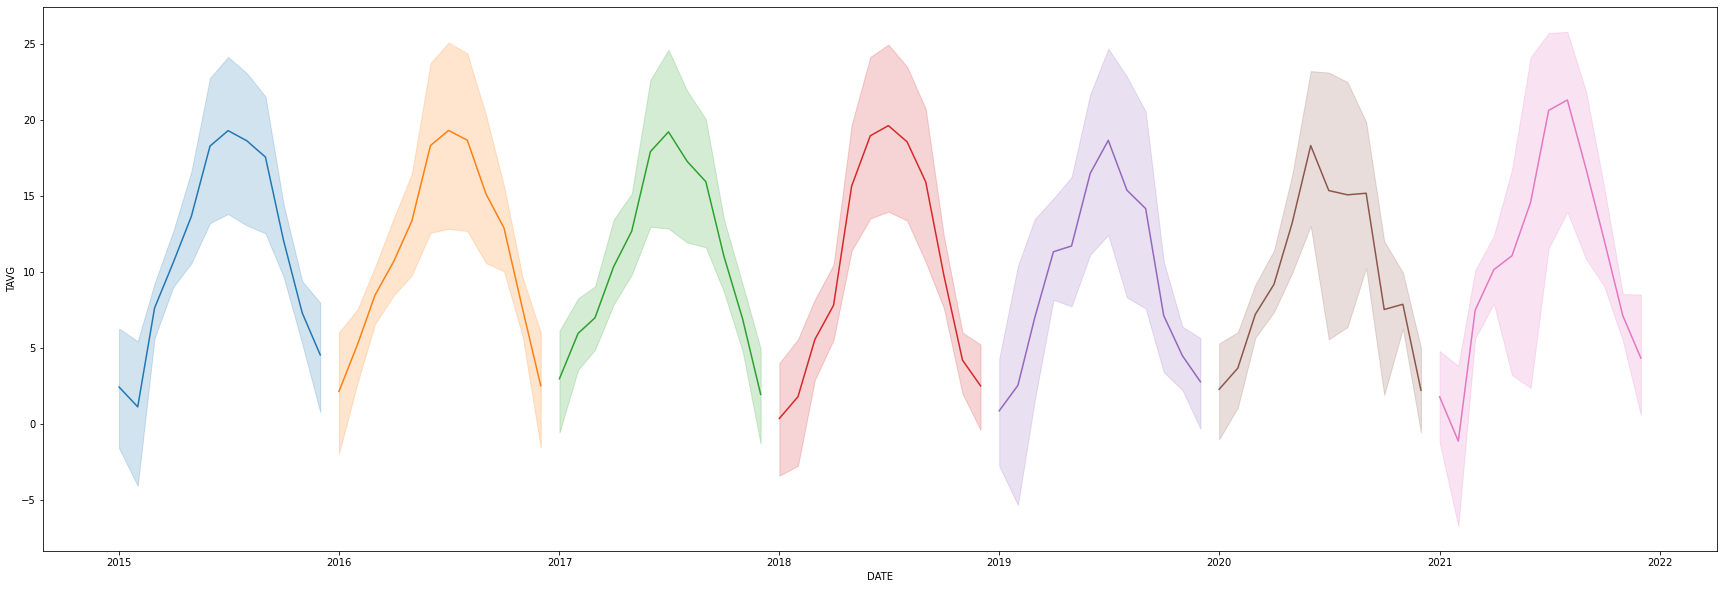

In [75]:
plt.figure(figsize=(30, 10))
for i in range(2015, 2022):
    plot_date(df, i)

In [20]:
valid_columns = []
for col in df.columns:
    if 'ATTRIBUTES' not in col and col not in ['TMIN', 'TMAX', 'TAVG'] and df[col].dtype == np.float64:
        valid_columns.append(col)
len(valid_columns)

38

/tmp/ipykernel_28845/1600669975.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 3)


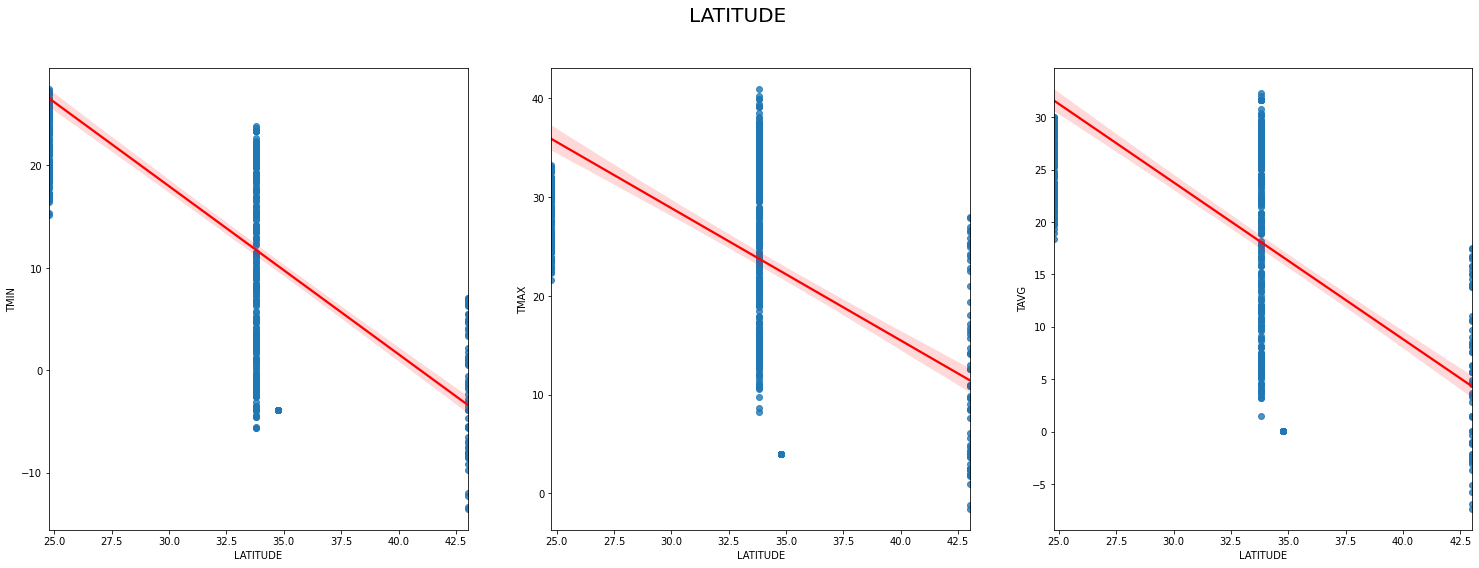

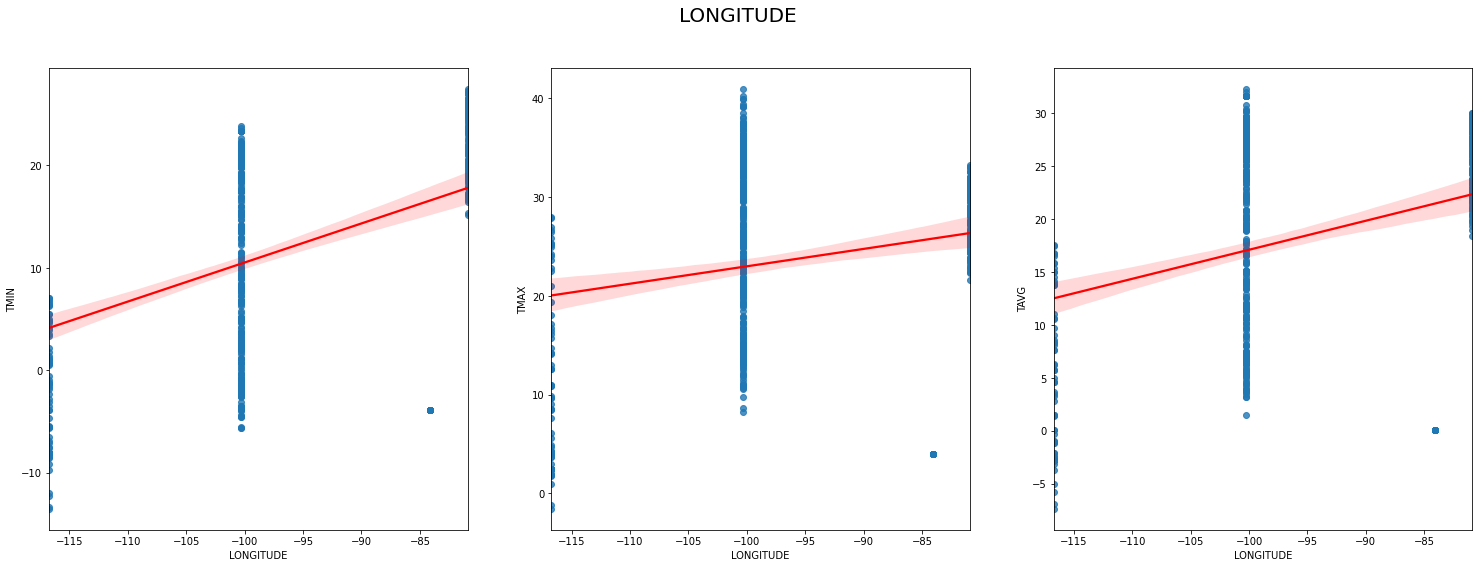

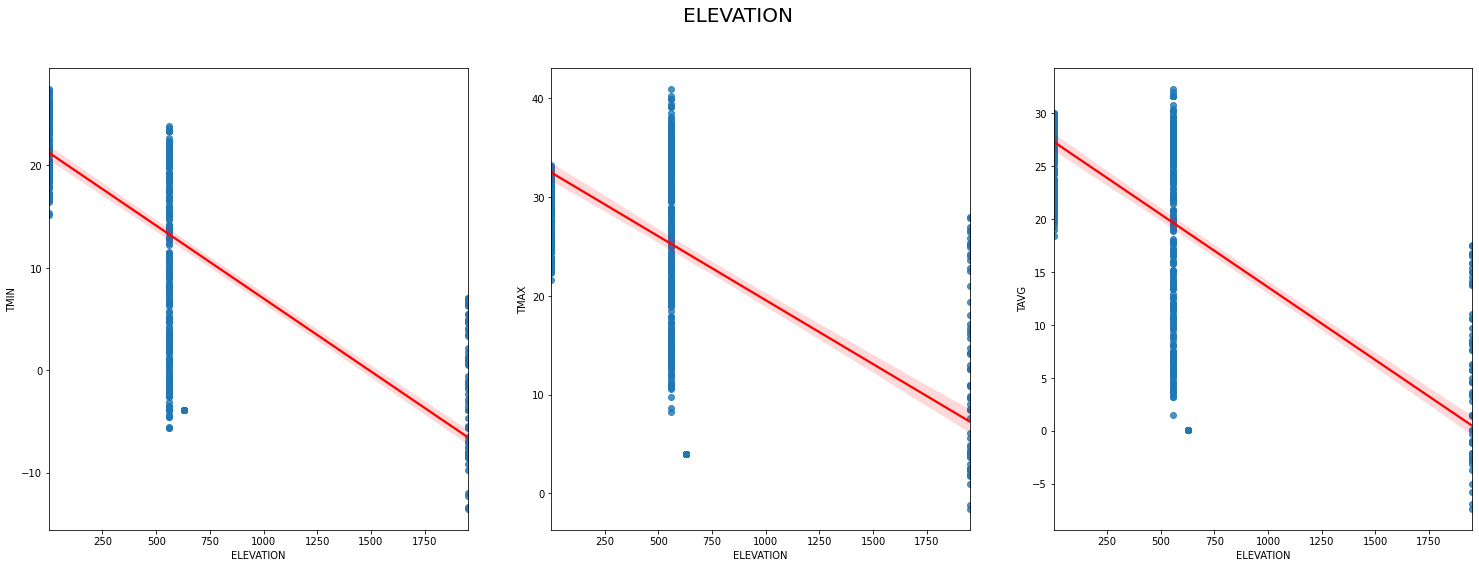

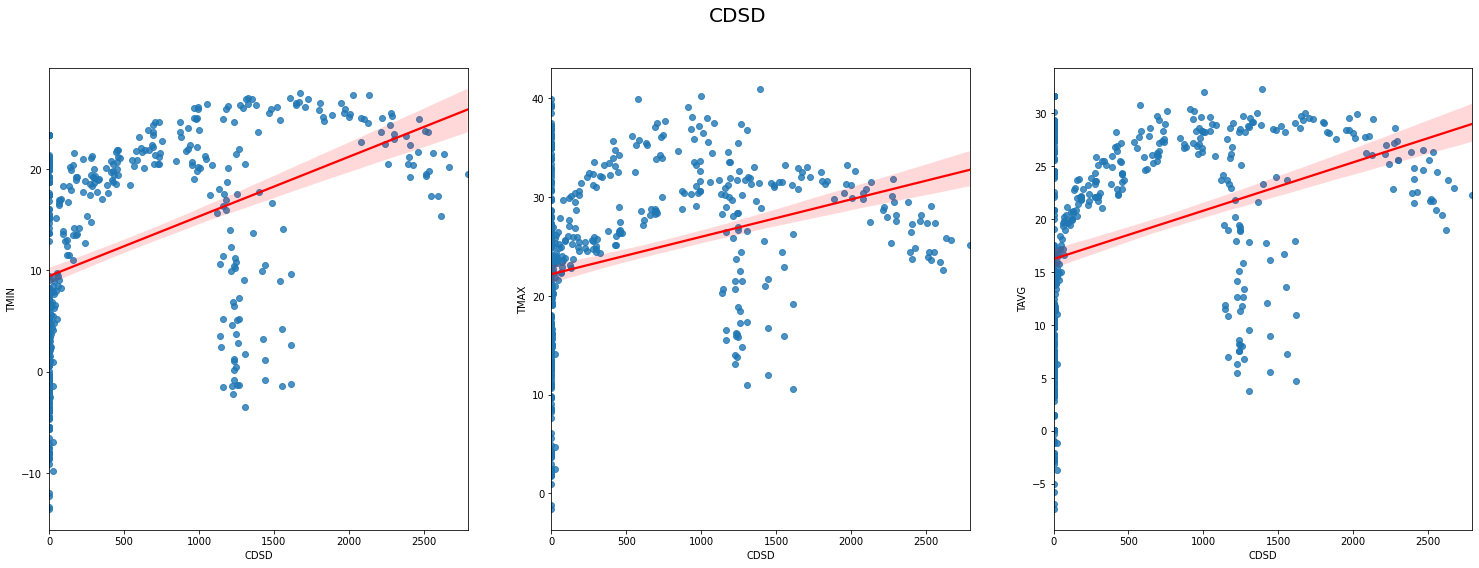

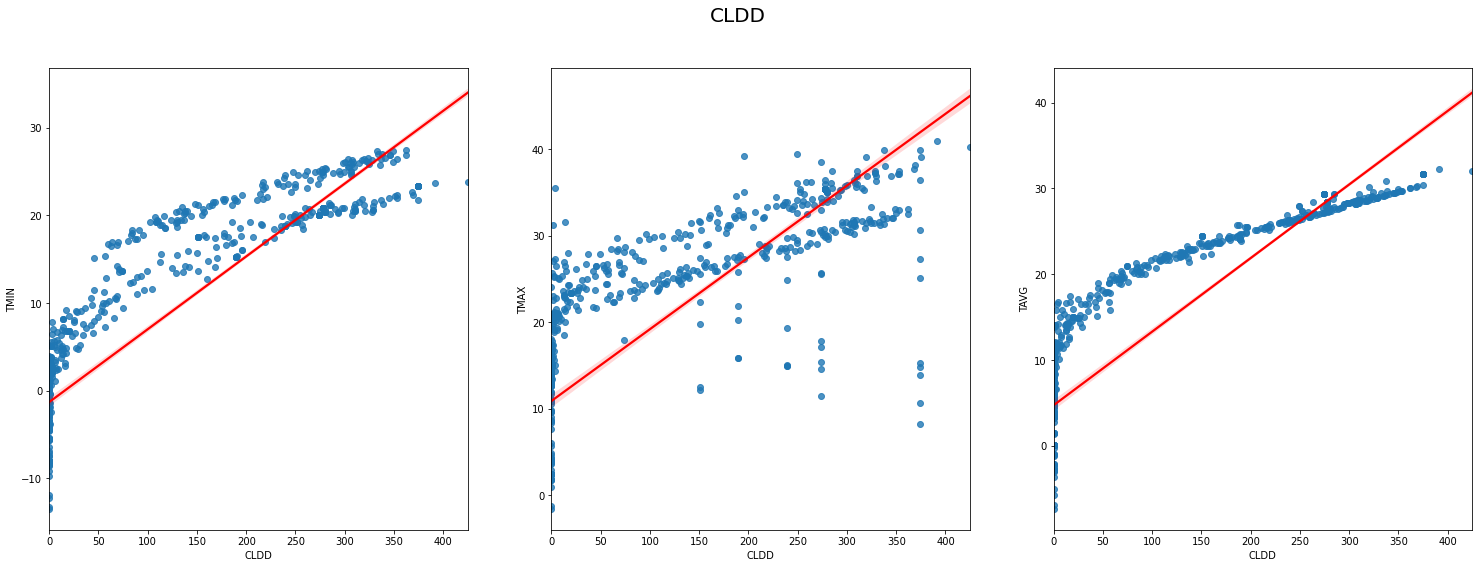

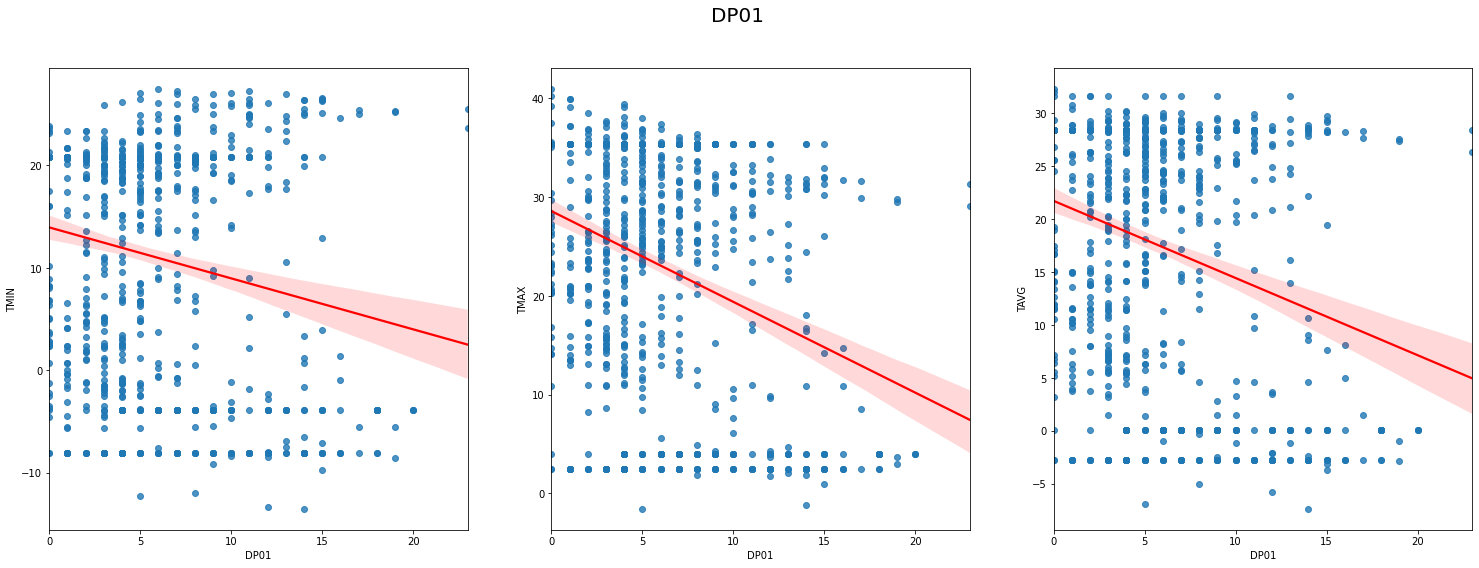

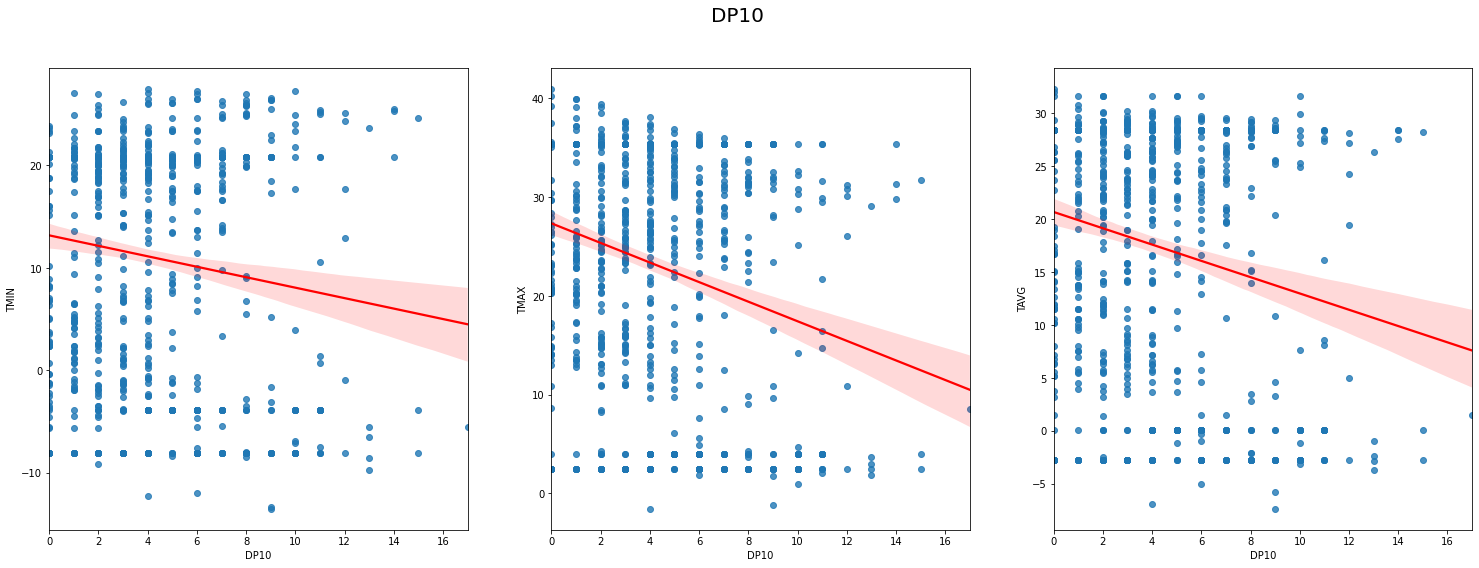

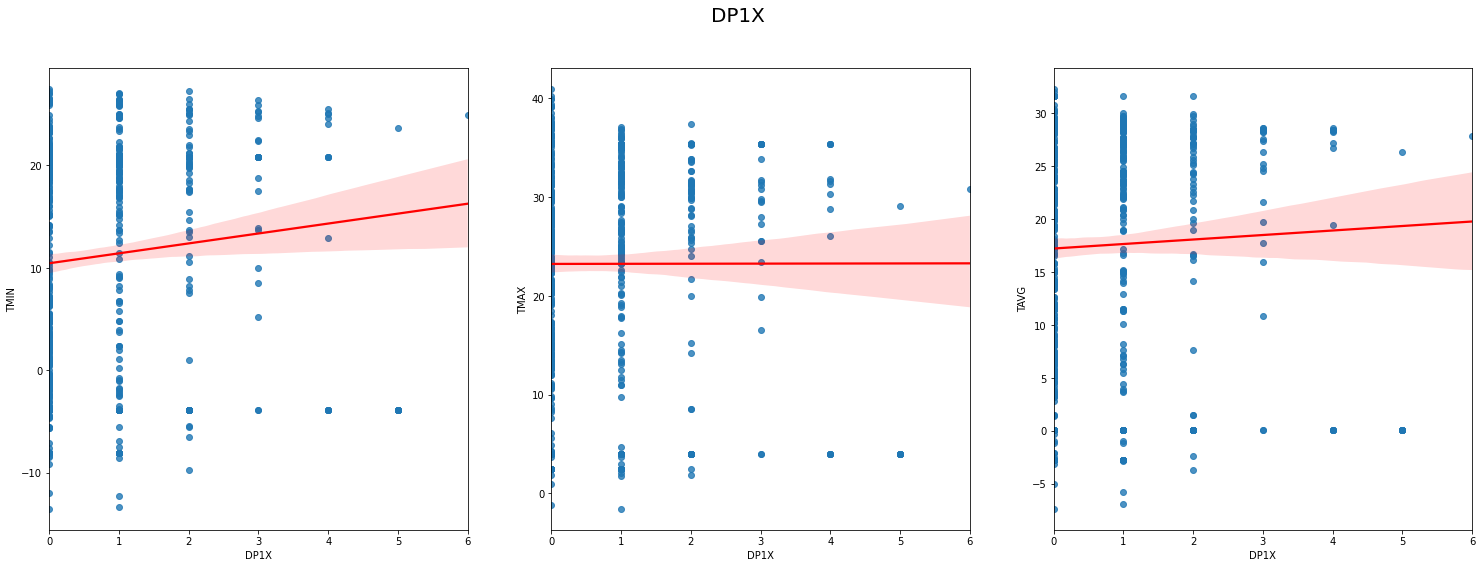

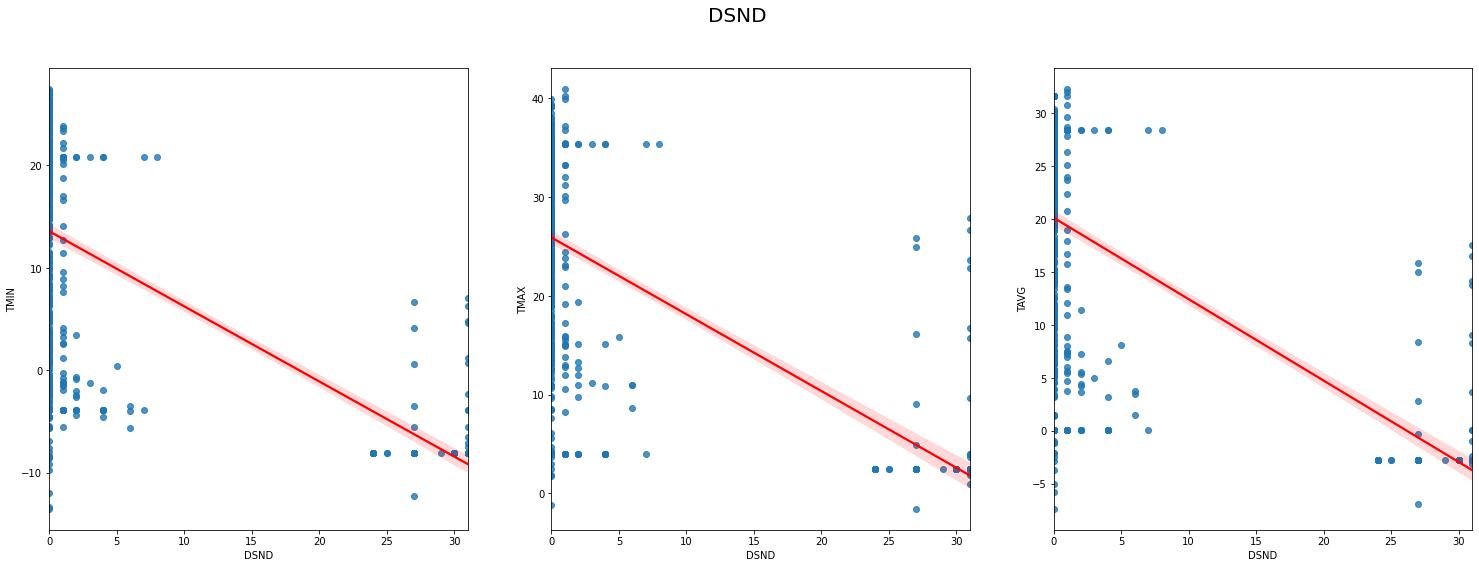

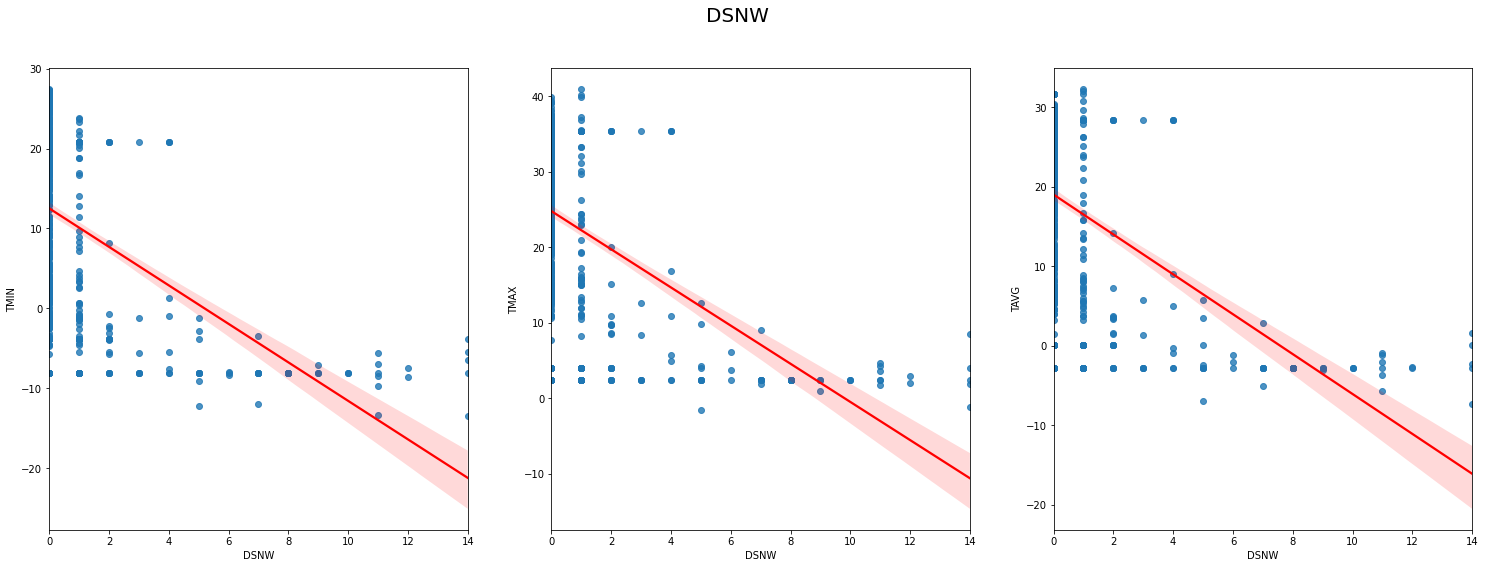

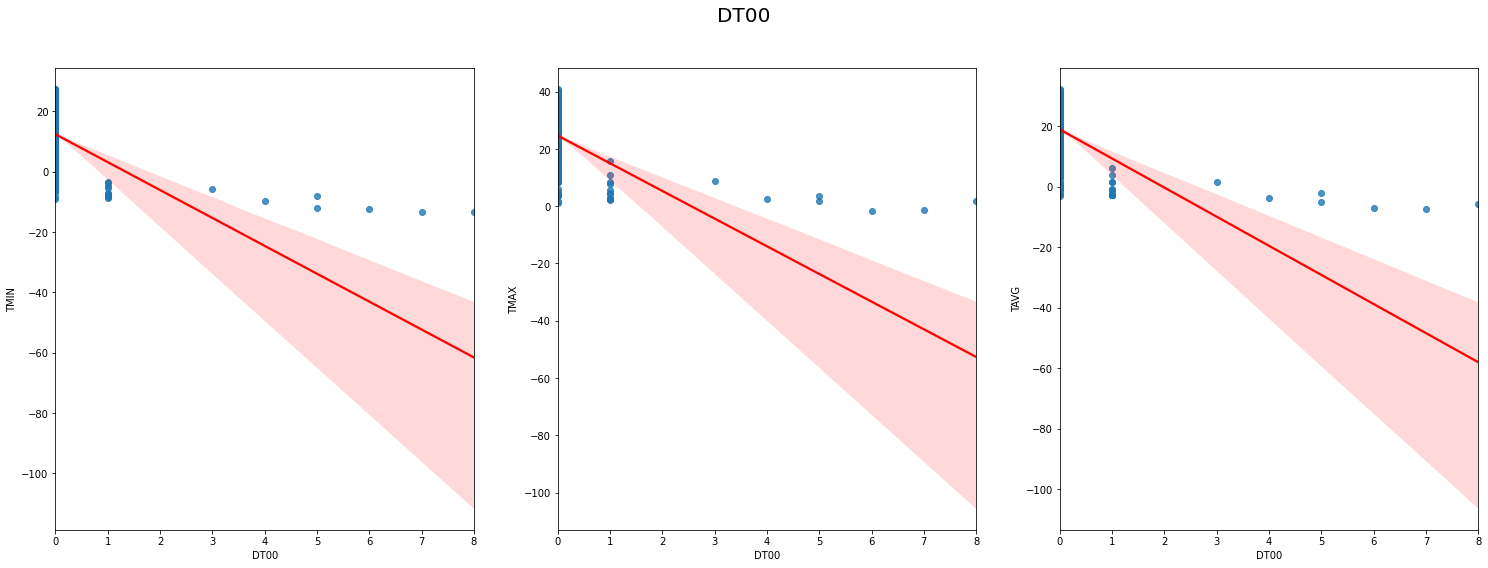

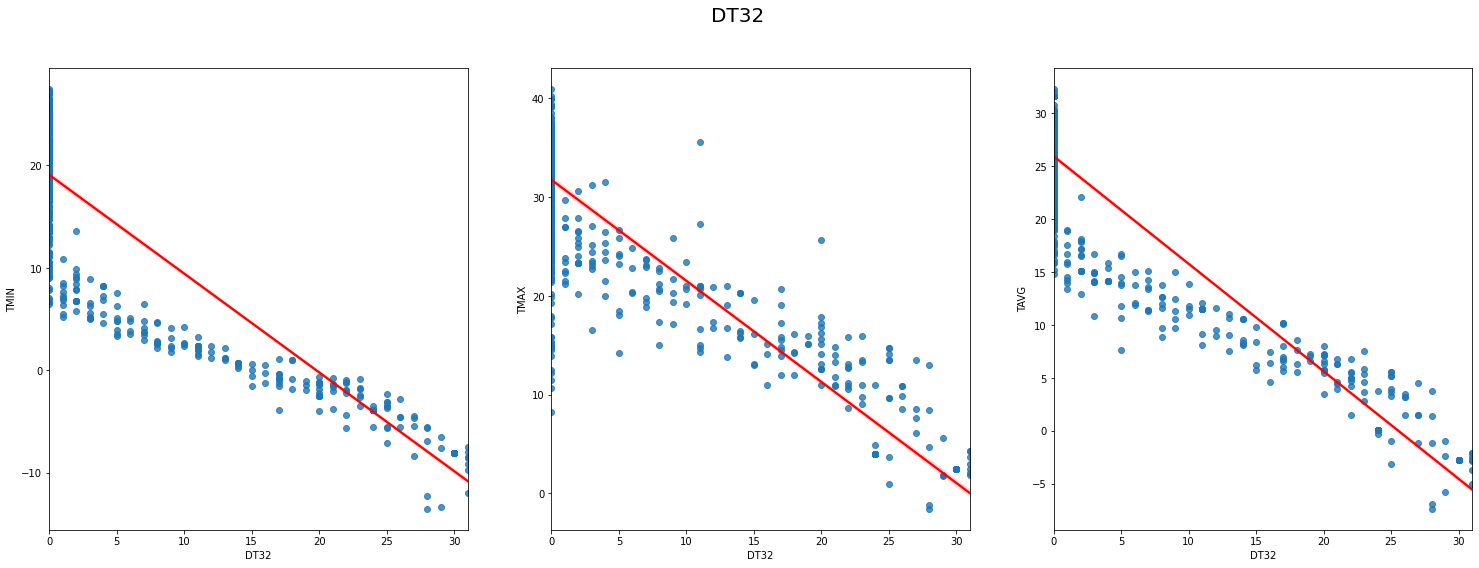

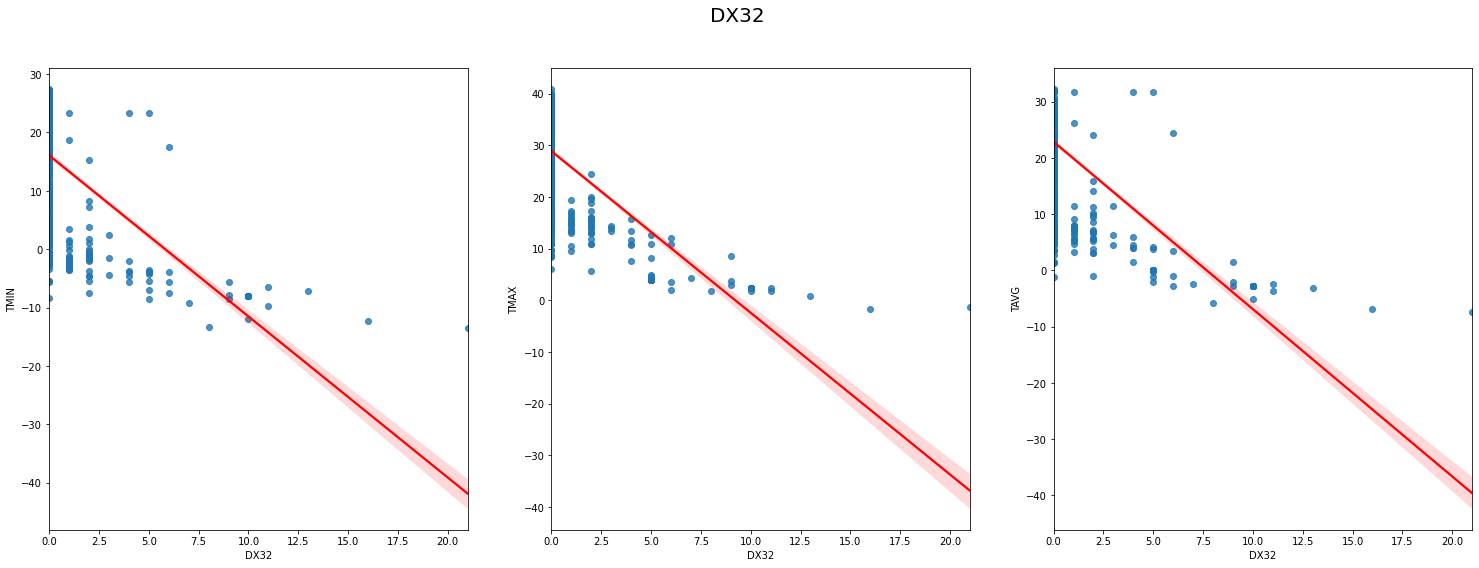

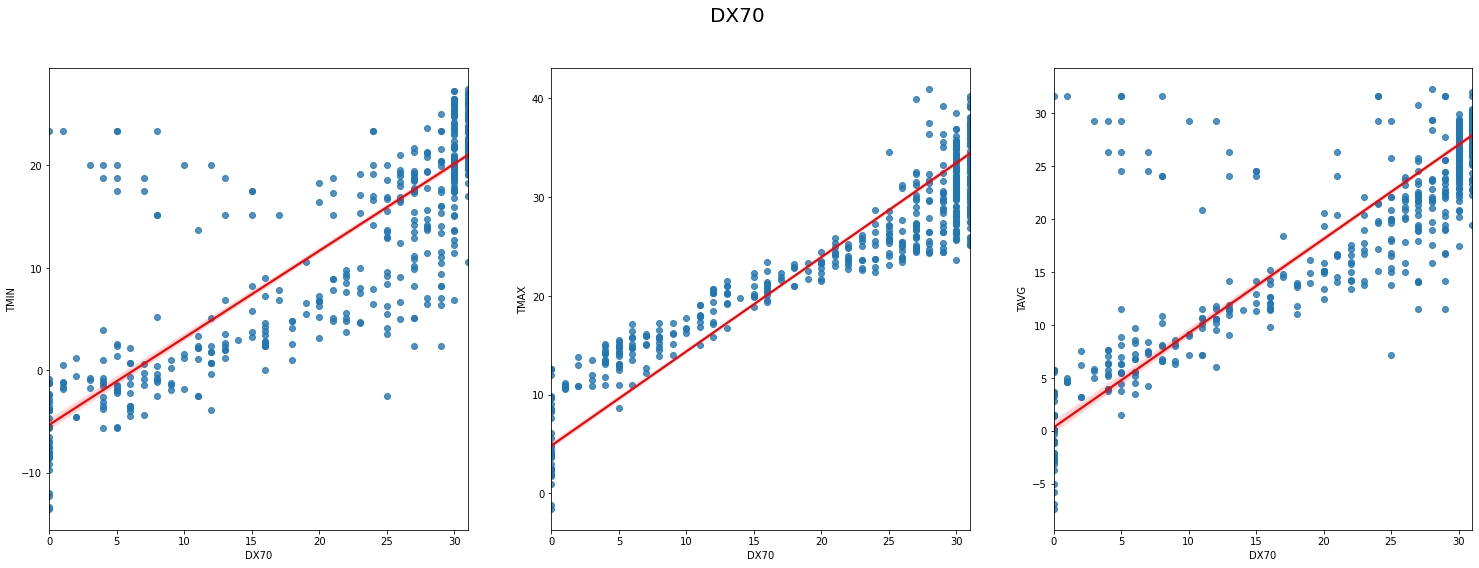

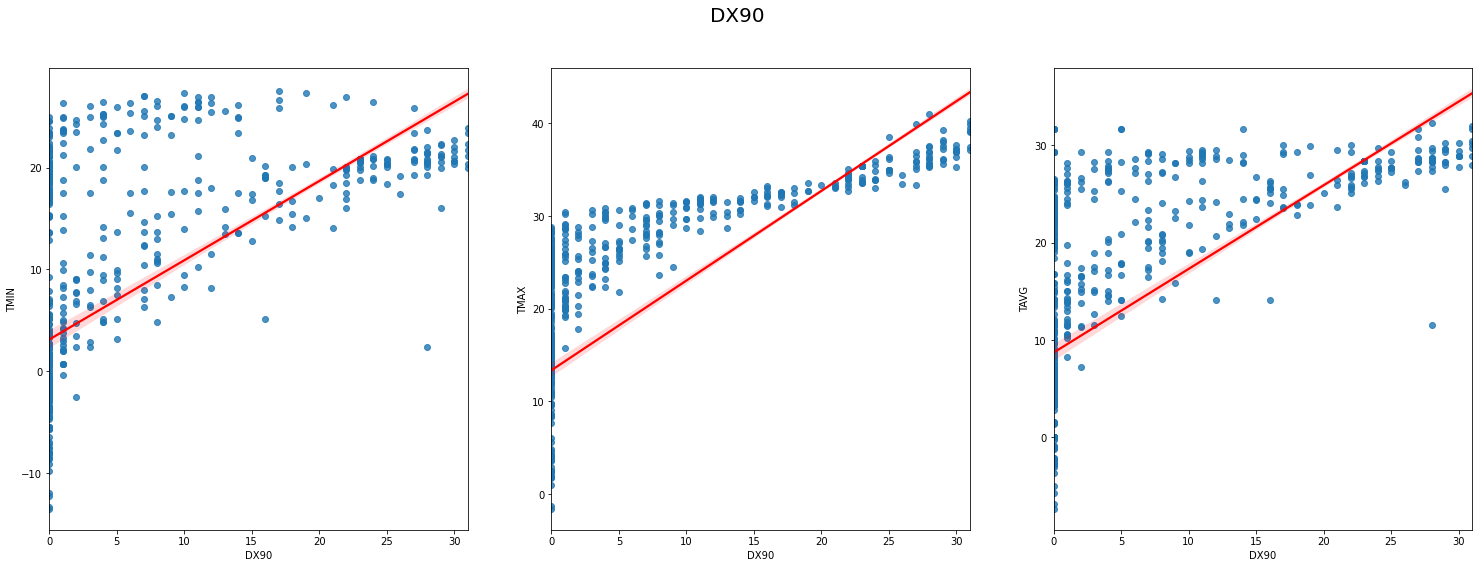

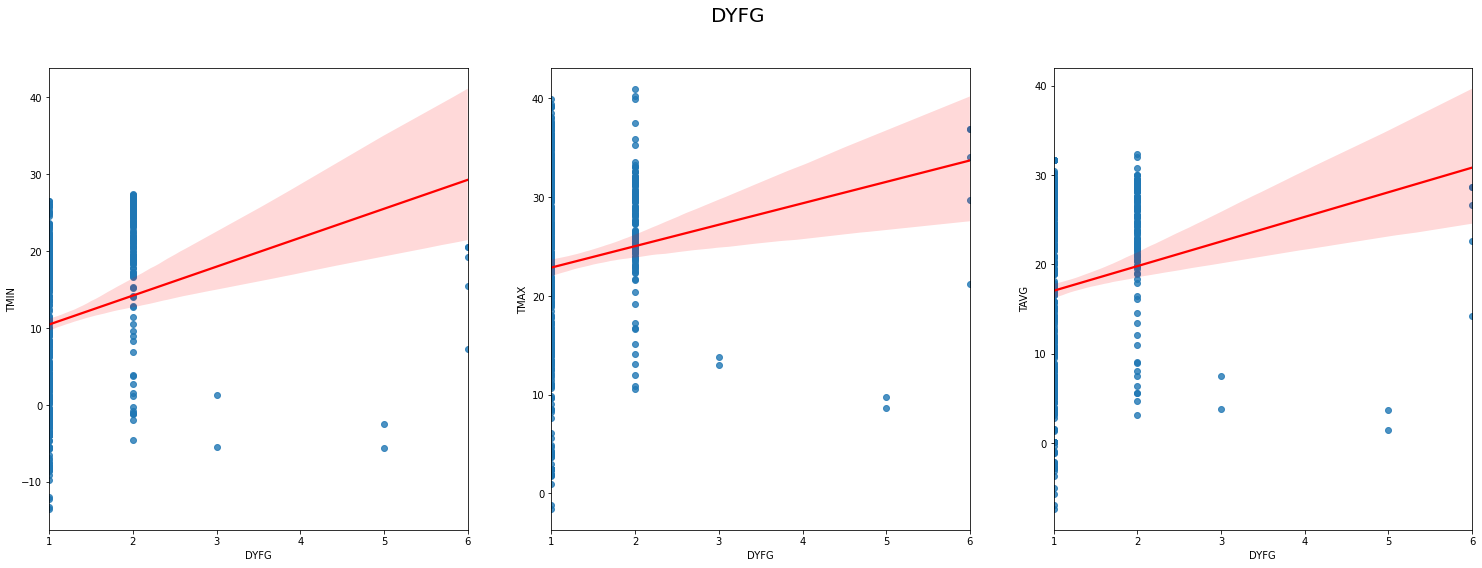

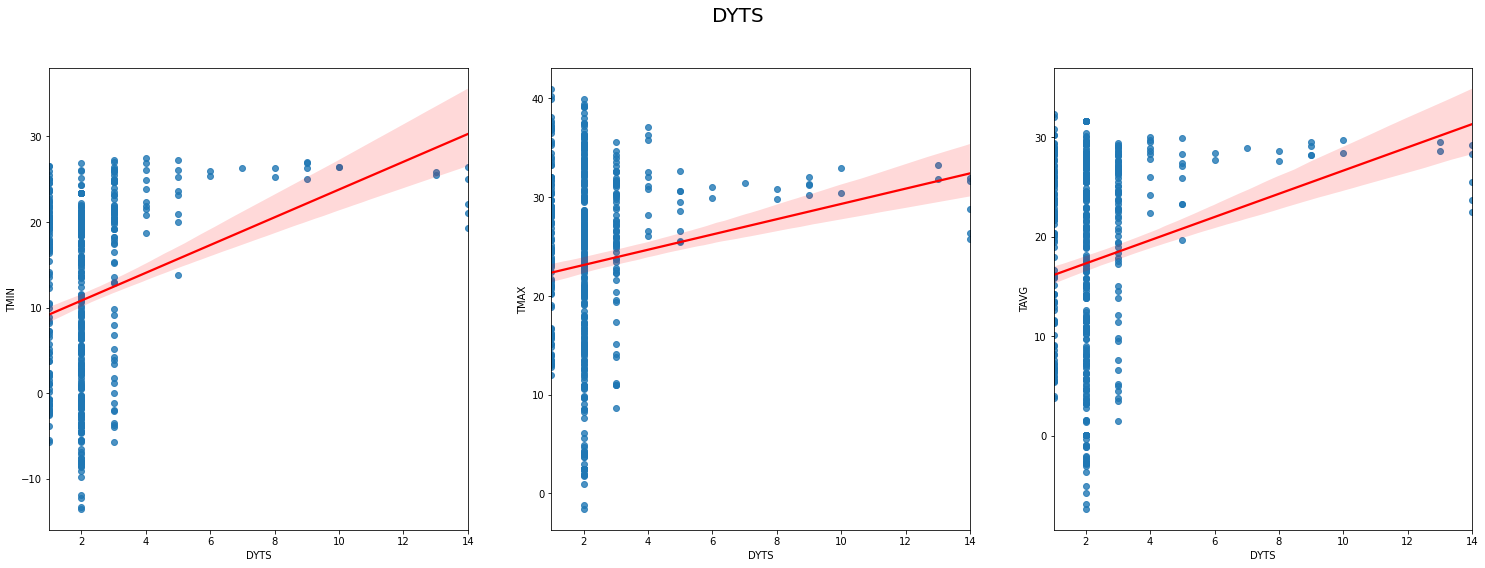

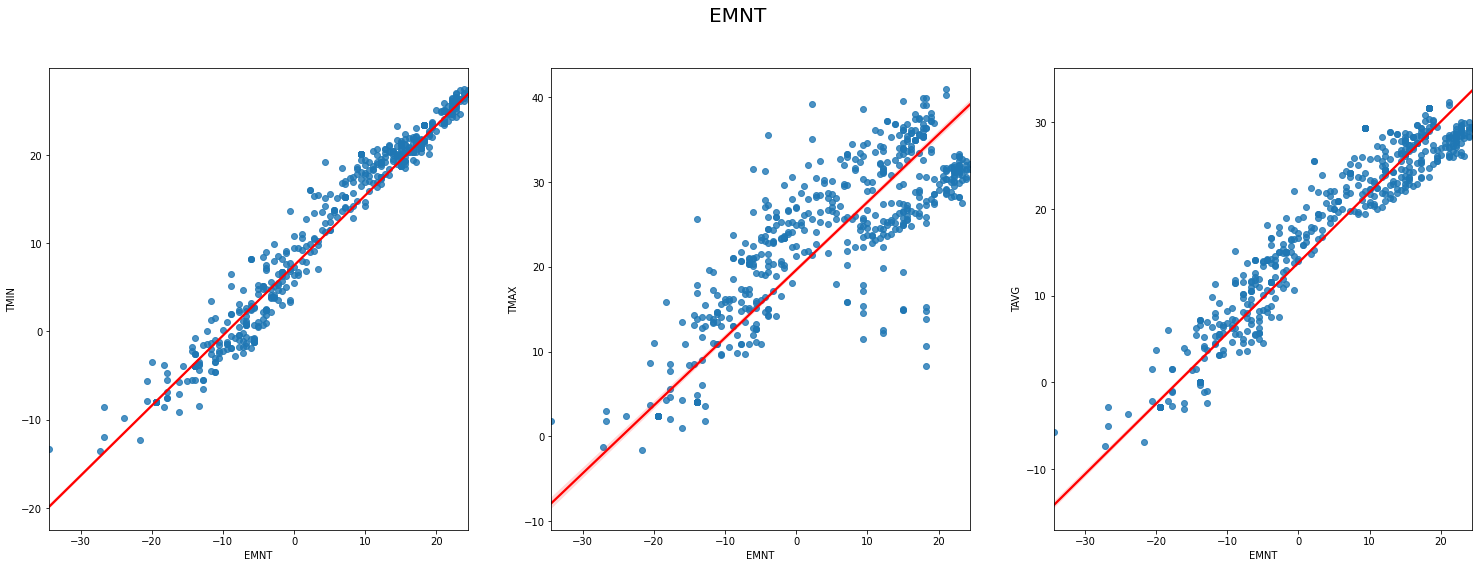

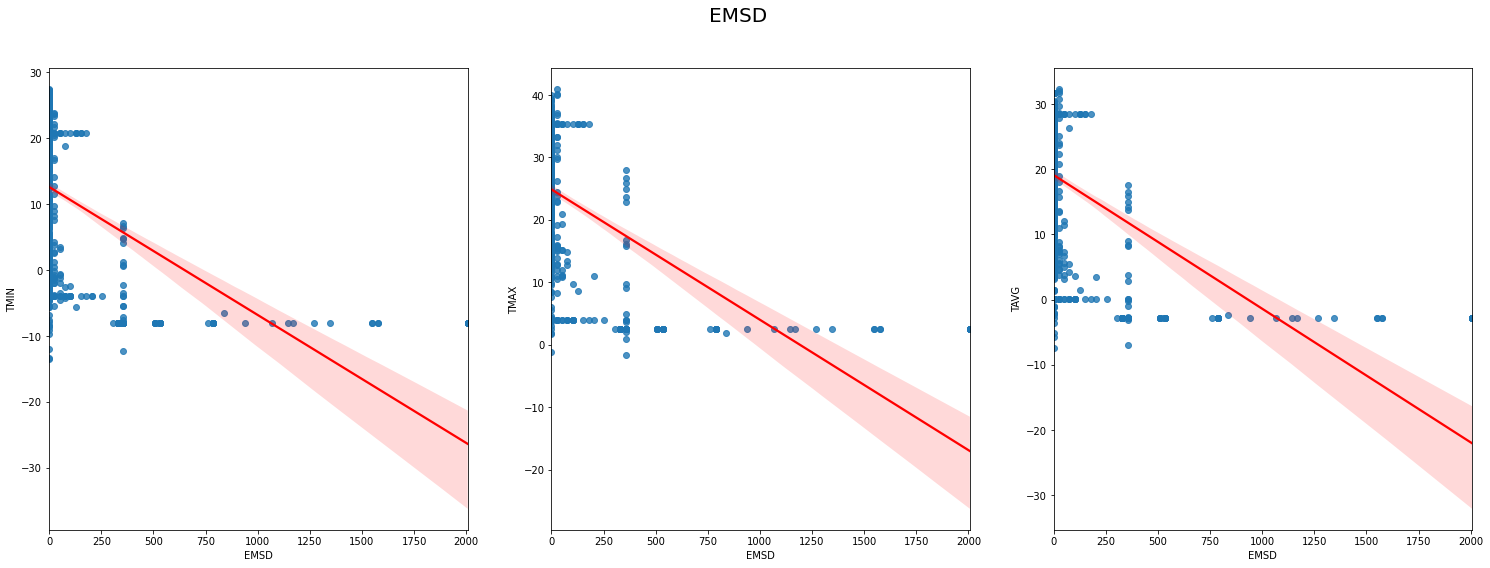

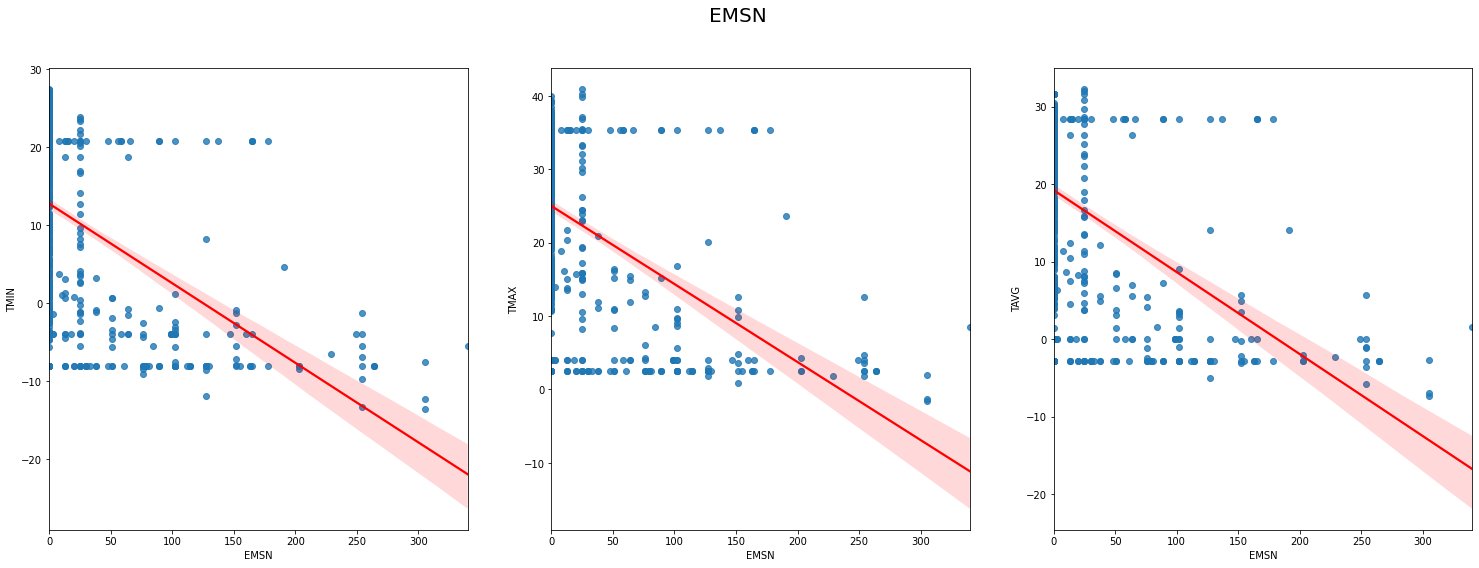

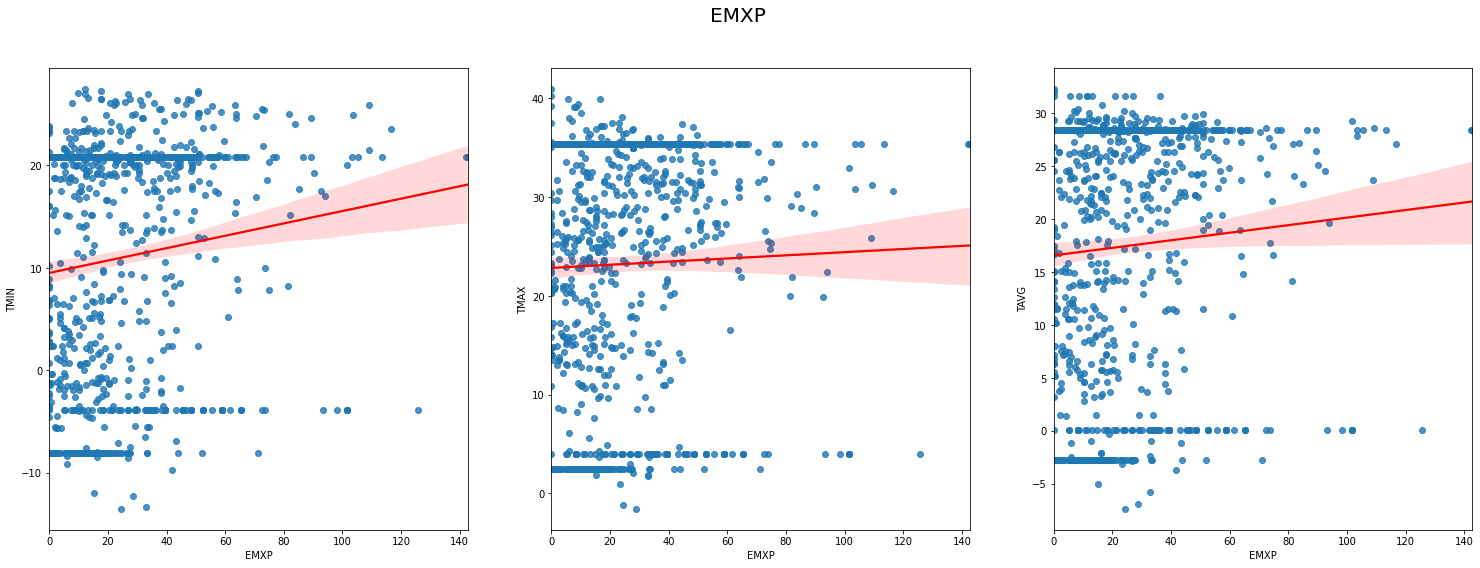

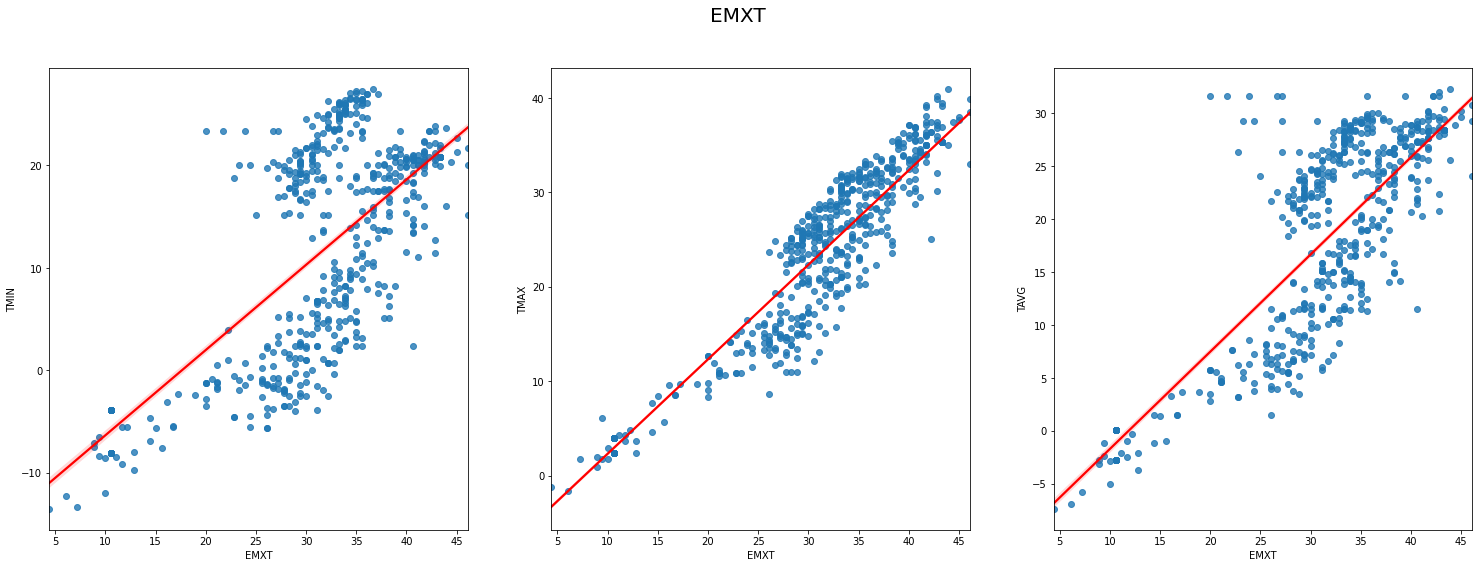

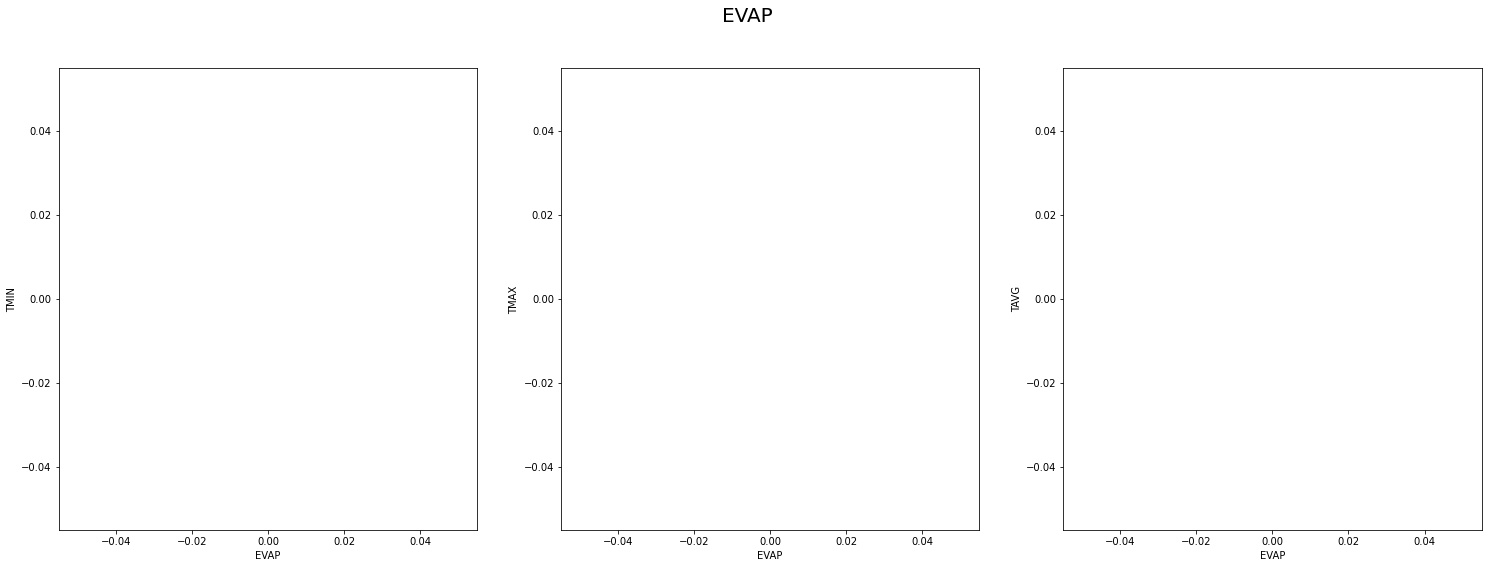

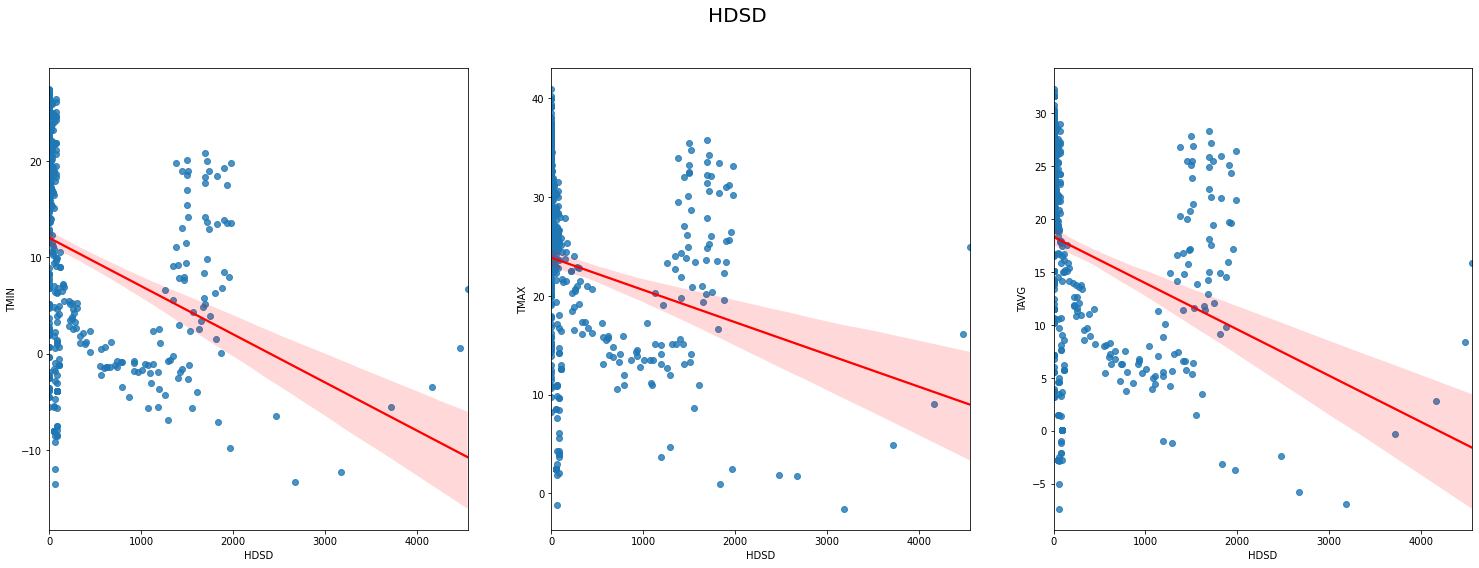

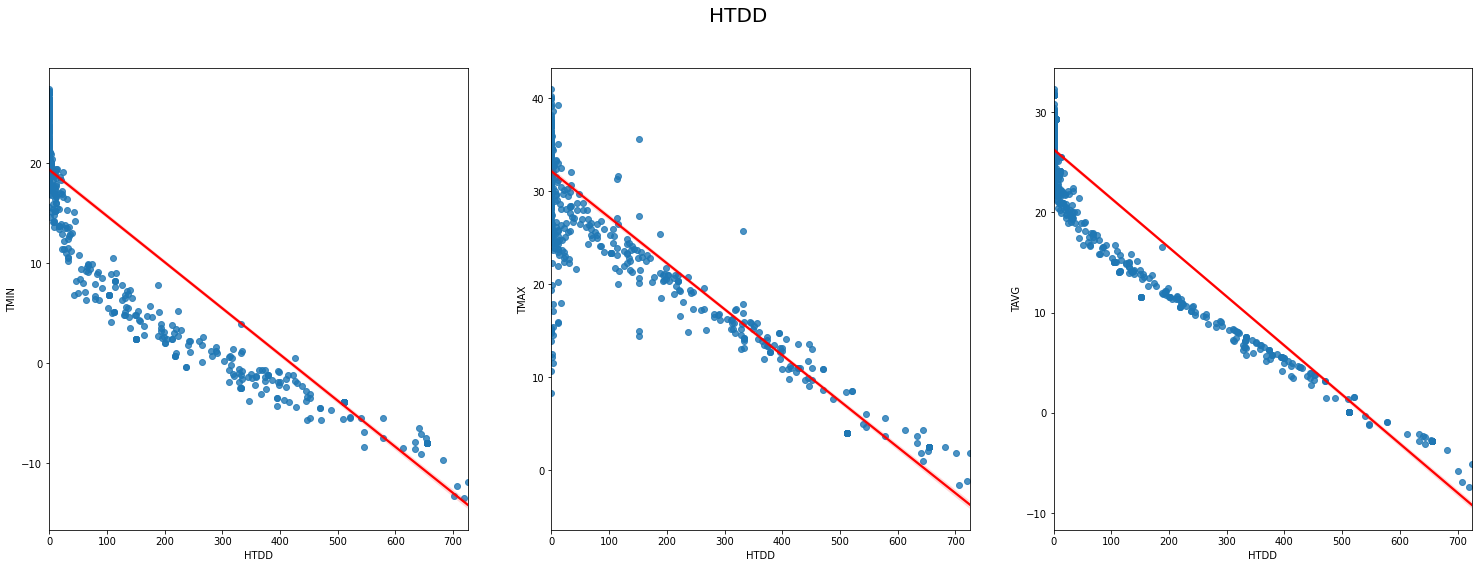

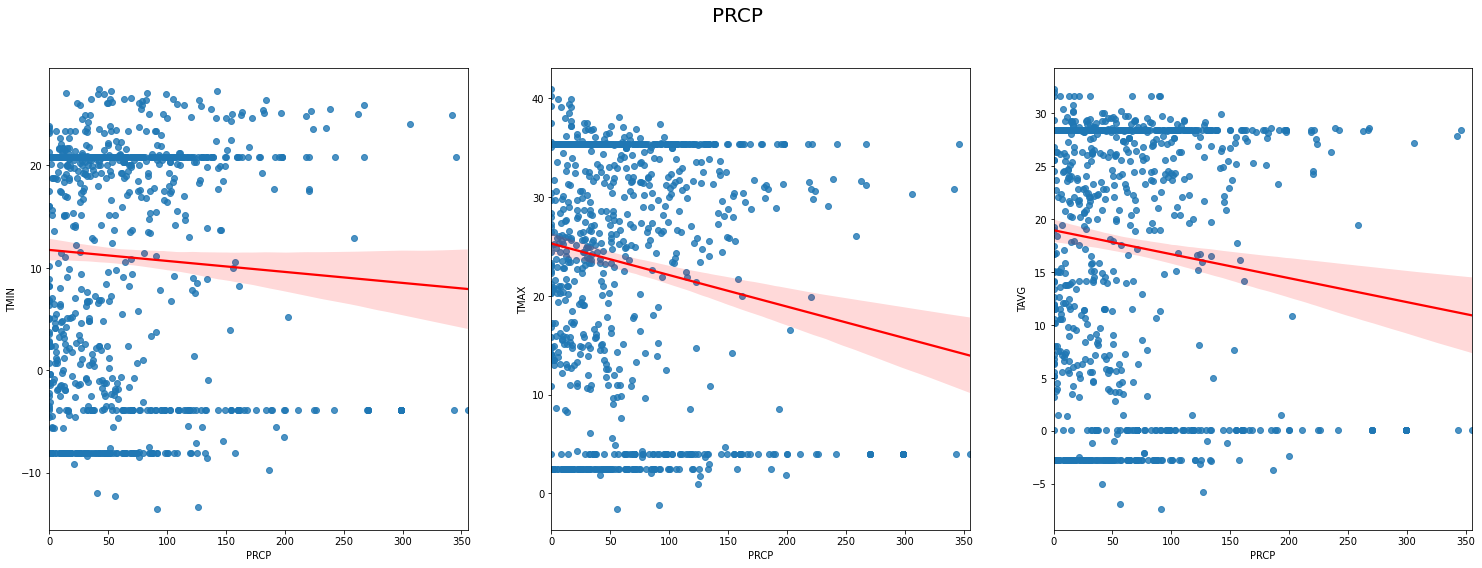

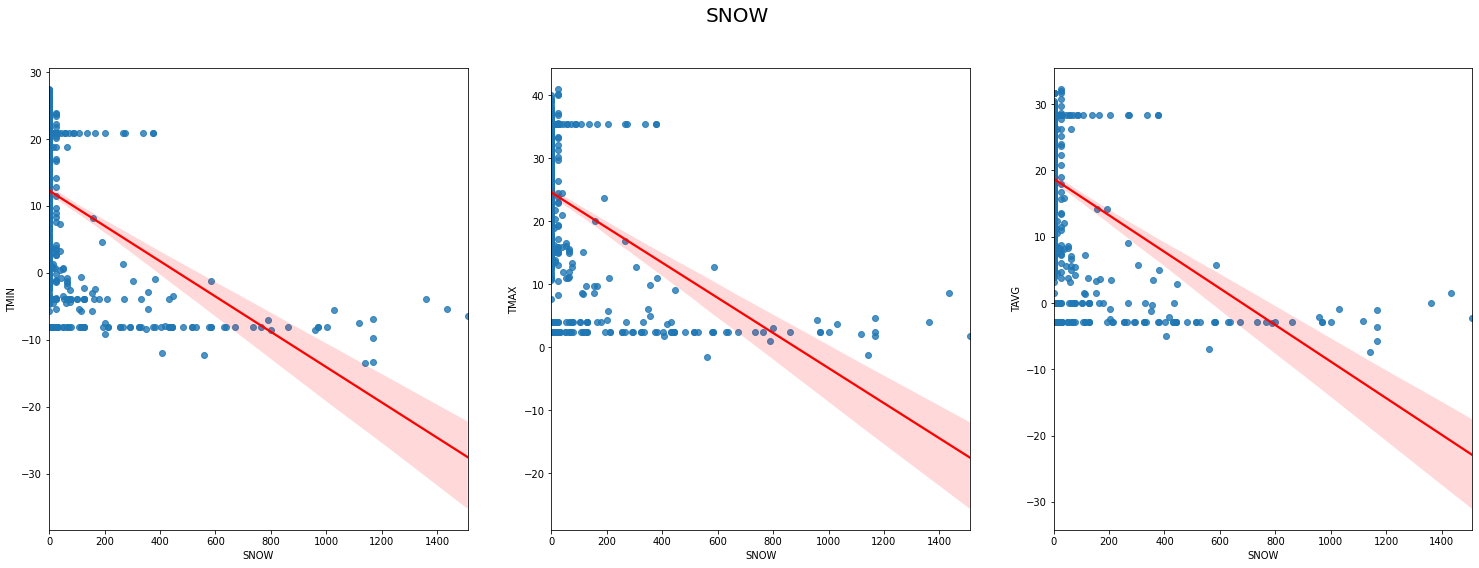

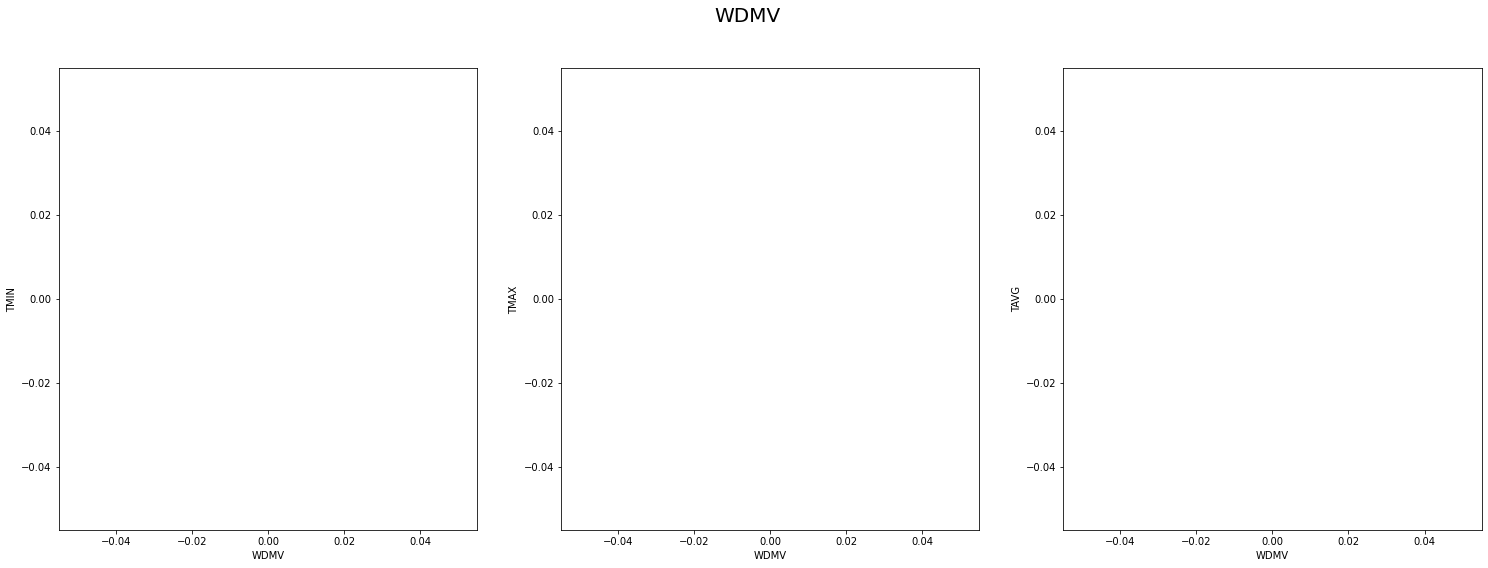

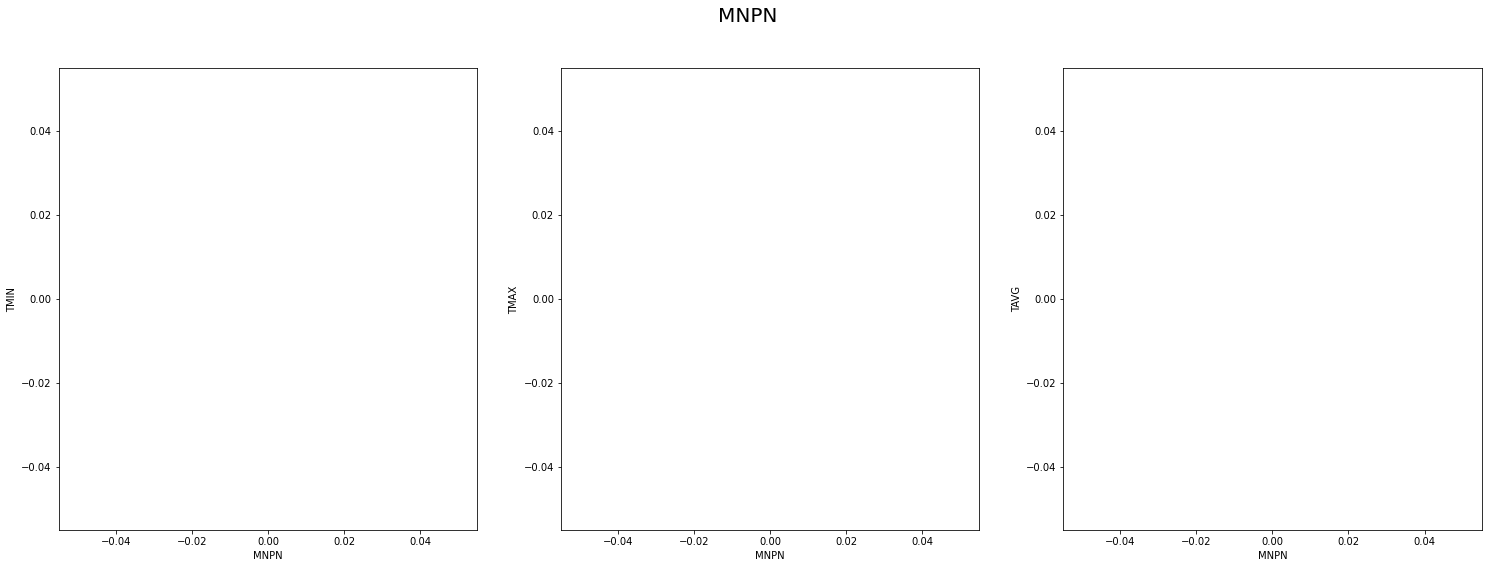

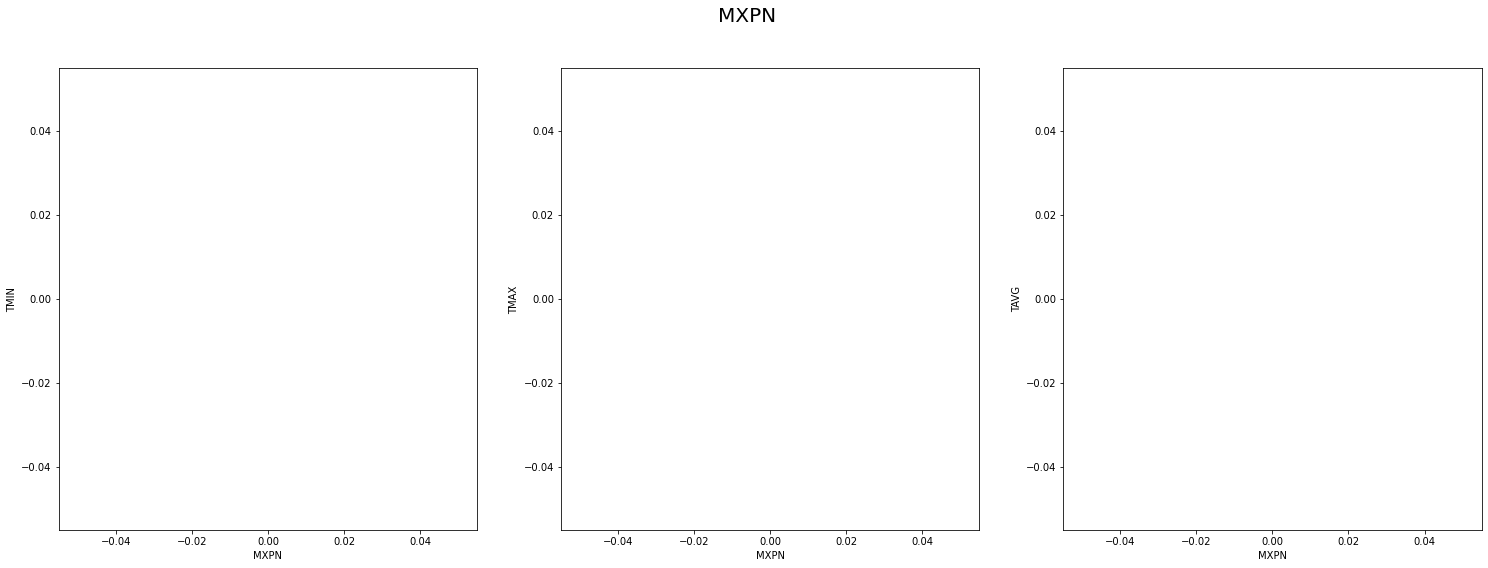

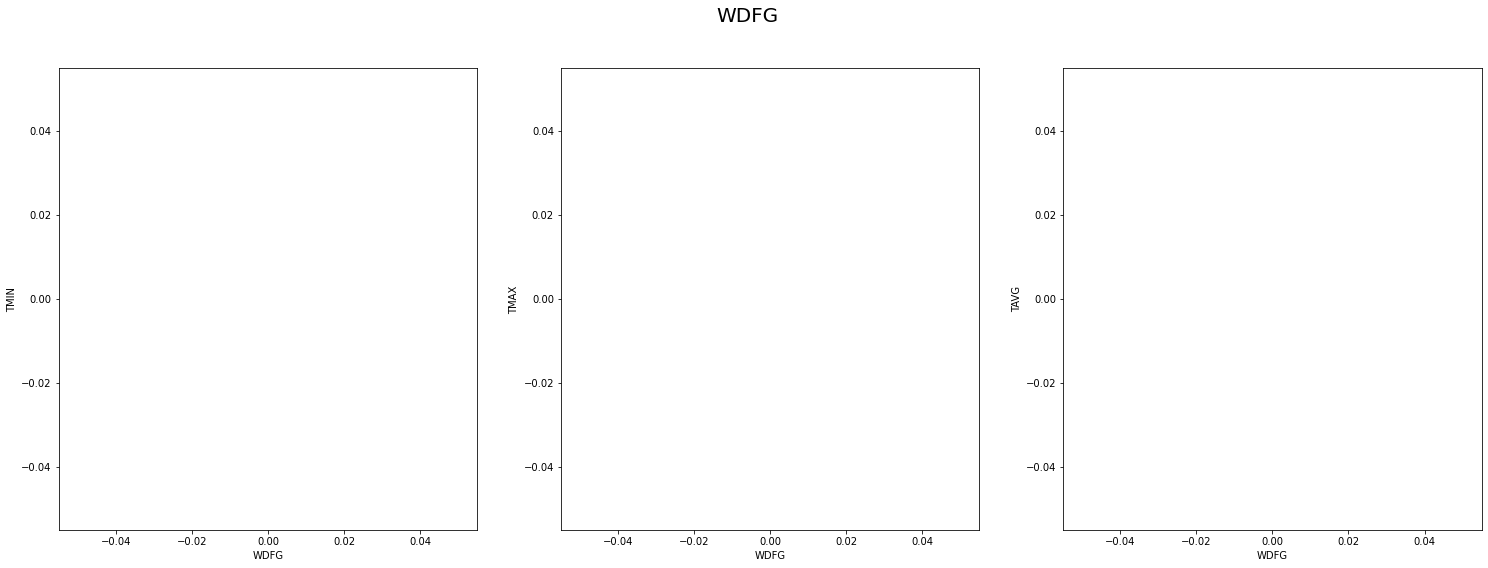

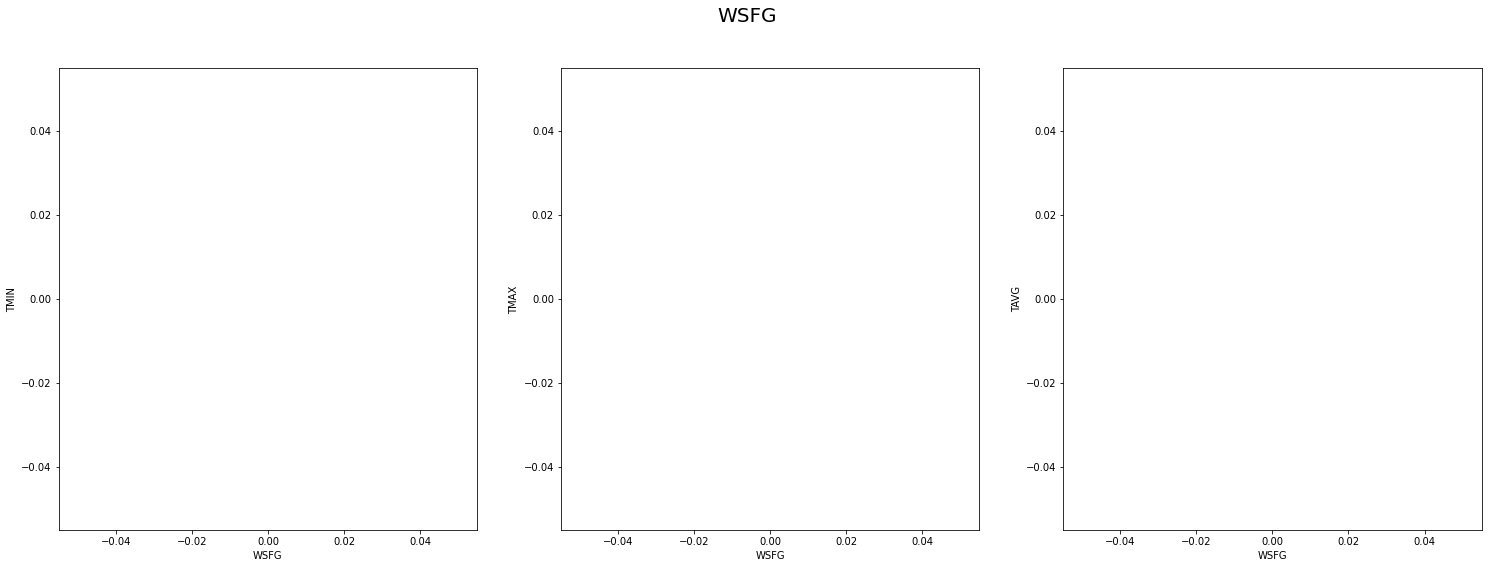

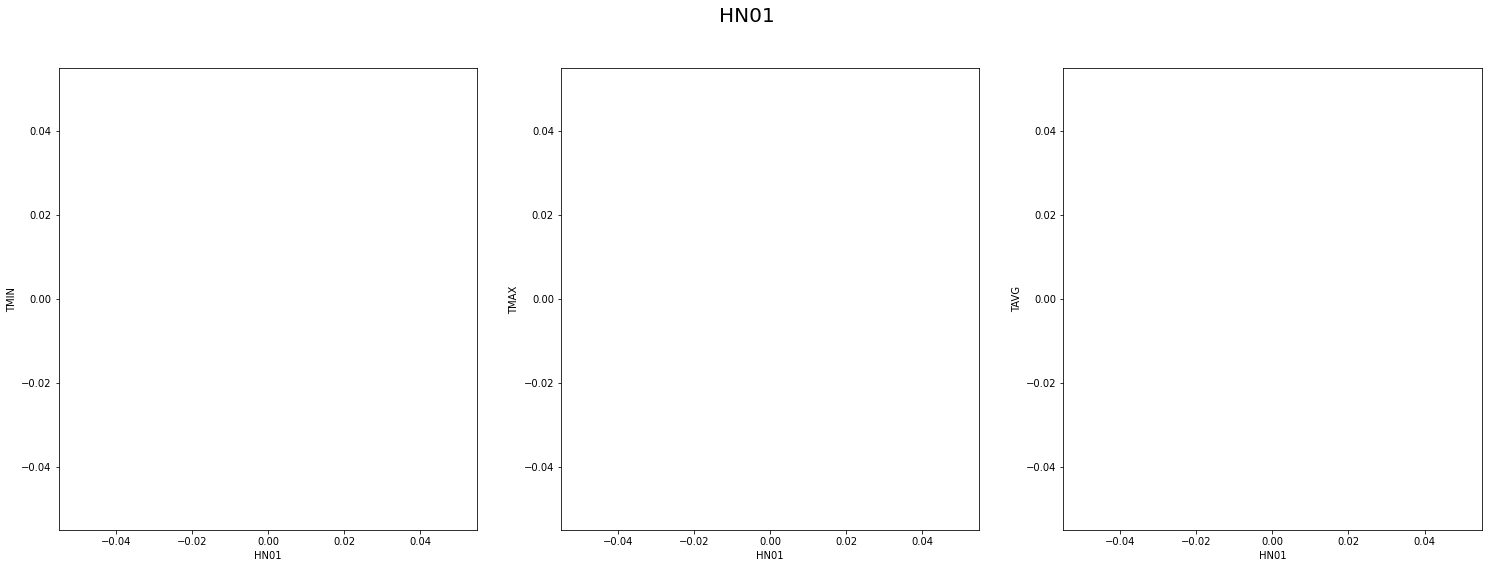

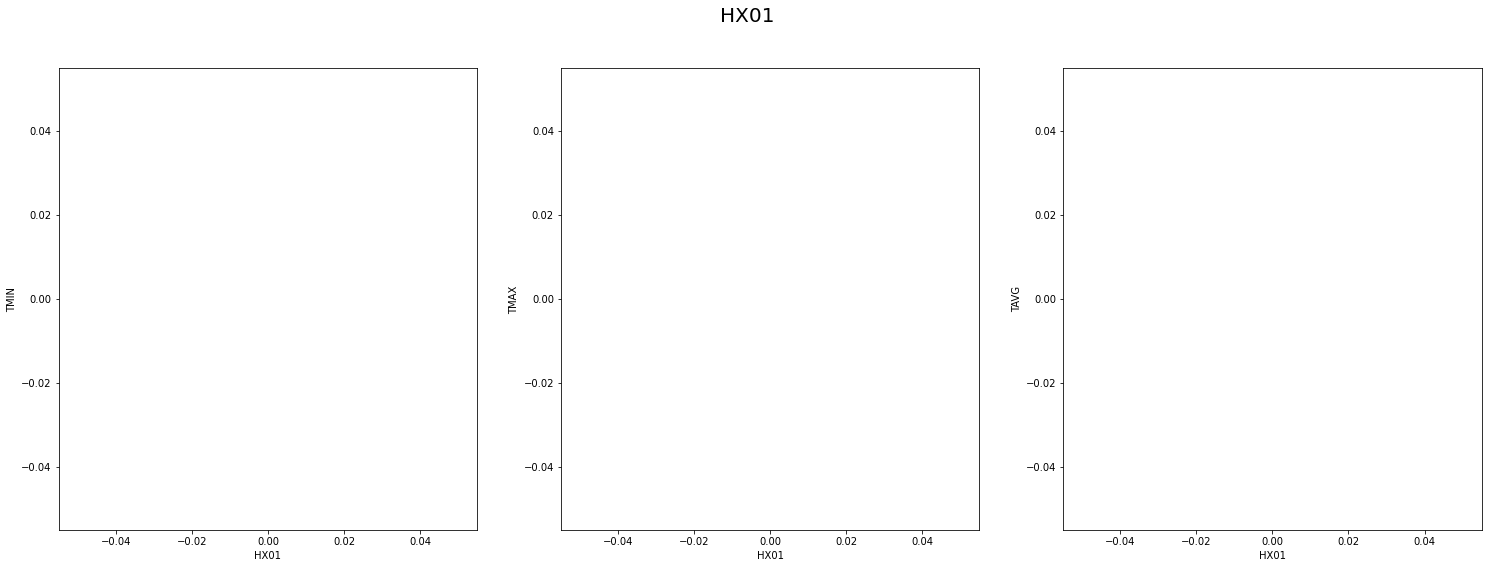

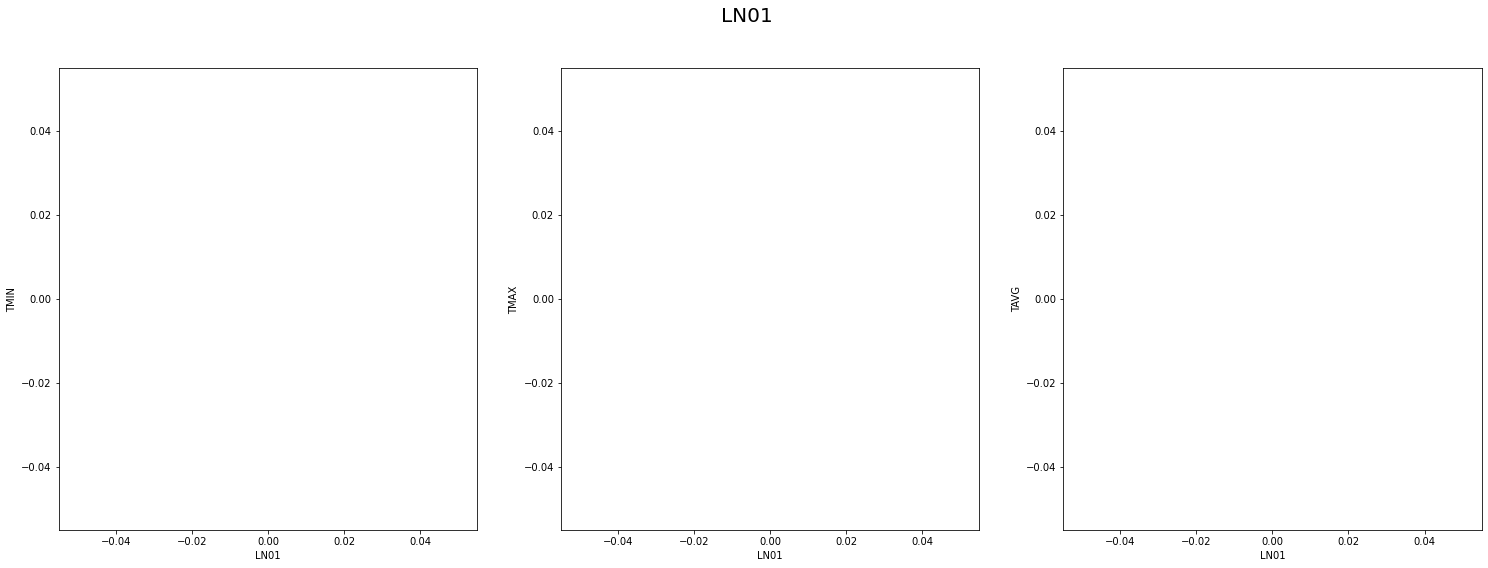

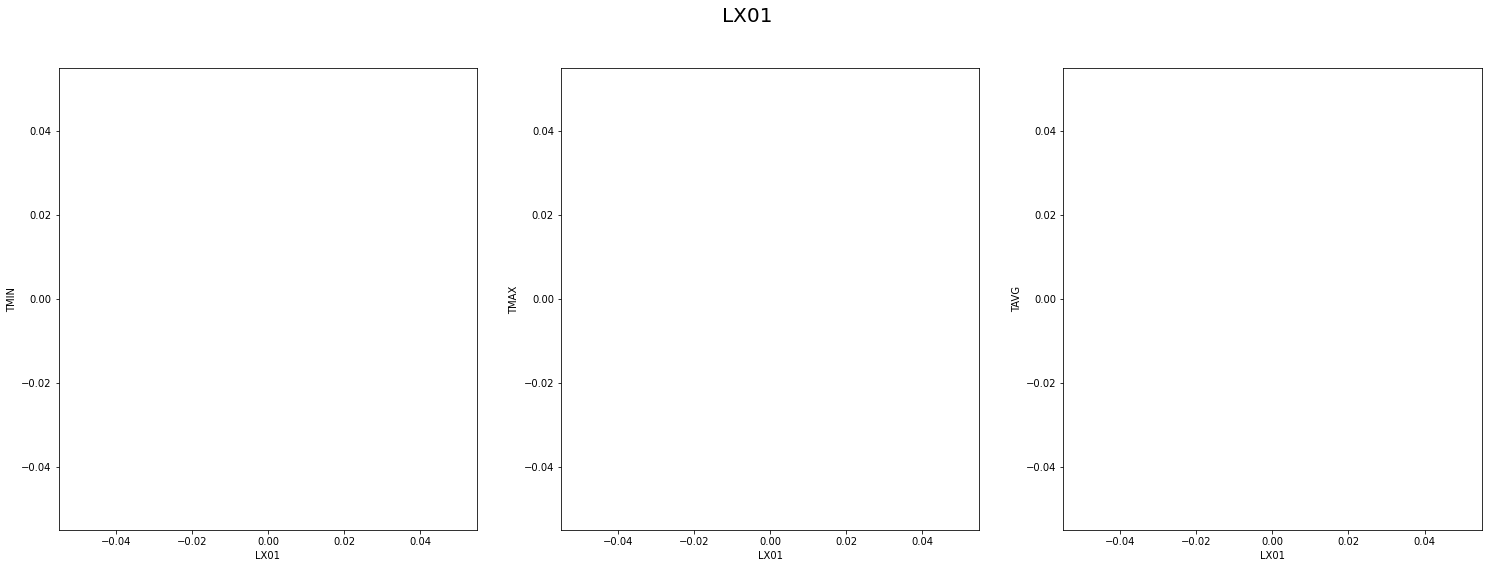

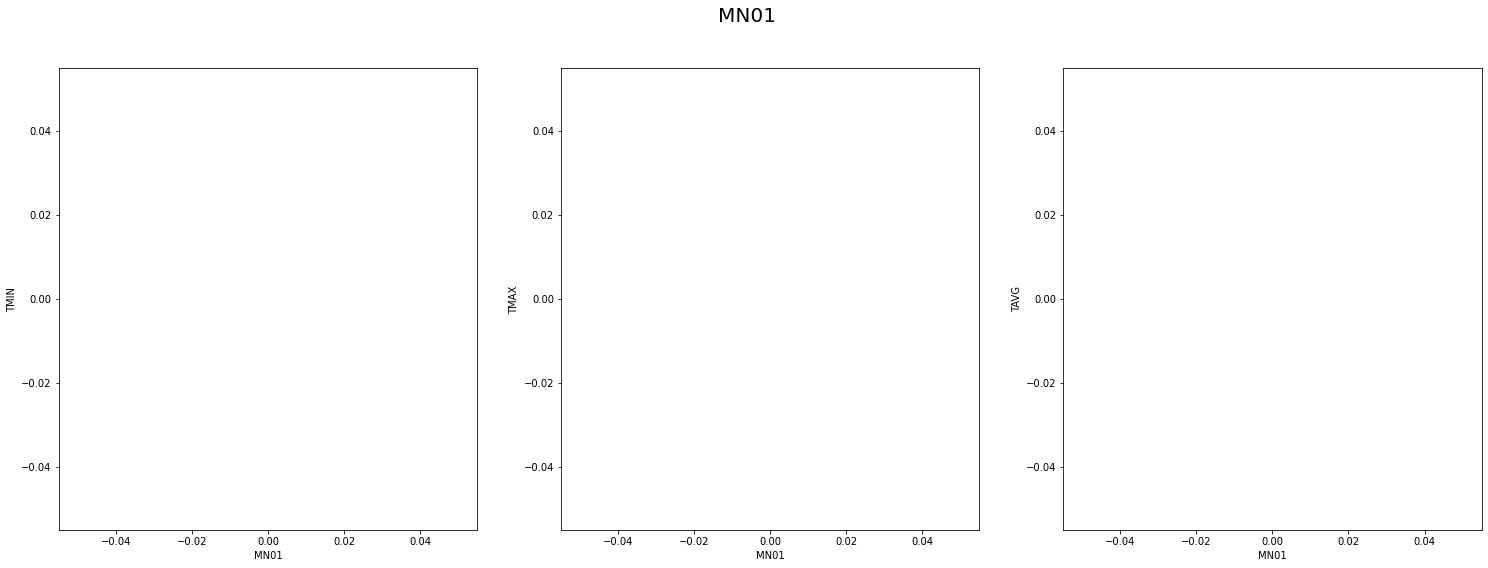

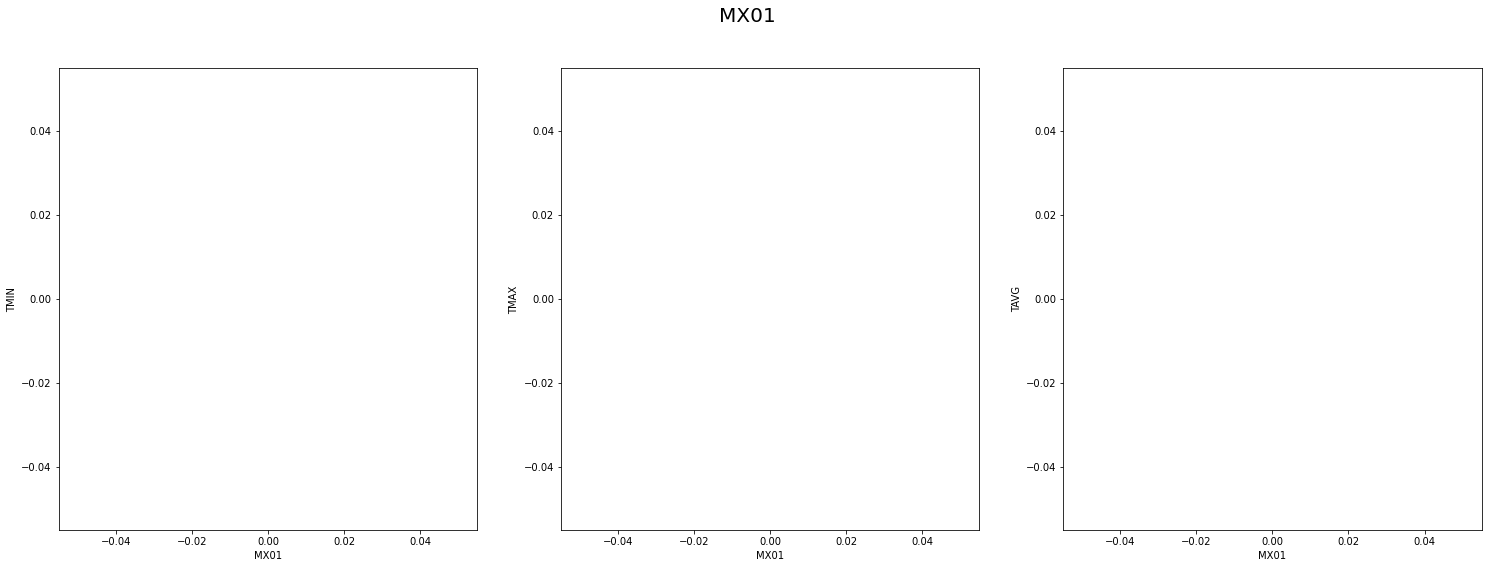

In [21]:
kwargs = {'data':df, 'line_kws':{"color": "red"}}
for valid_col in valid_columns:
    fig, axes = plt.subplots(1, 3)
    fig.set_size_inches(25.5, 8.5)
    sns.regplot(ax=axes[0], x=valid_col, y="TMIN", **kwargs)
    sns.regplot(ax=axes[1], x=valid_col, y="TMAX", **kwargs)
    sns.regplot(ax=axes[2], x=valid_col, y="TAVG", **kwargs)
    fig.suptitle(valid_col, fontsize=20)